# OBESITY LEVELS PREDICTION USING MACHINE LEARNING AND DEEP LEARNING METHODS


In [1]:
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# IMPORTING NECESSARY LIBRARIES AND MODELS

In [3]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, pairwise_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

#DATASET EXPLORATION AND VISUALISATION

In [6]:
#total samples of the dataset => 34597
train=pd.read_csv("/content/gdrive/MyDrive/train1.csv") #20757
test=pd.read_csv("/content/gdrive/MyDrive/test1.csv")   #13840

In [7]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [8]:
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [11]:
train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [12]:
test.describe()

id           Age        Height        Weight          FCVC  \
count  13840.000000  13840.000000  13840.000000  13840.000000  13840.000000   
mean   27677.500000     23.952740      1.698934     87.384504      2.442898   
std     3995.408198      5.799814      0.088761     26.111819      0.531606   
min    20758.000000     14.000000      1.450000     39.000000      1.000000   
25%    24217.750000     20.000000      1.631662     65.000000      2.000000   
50%    27677.500000     22.906342      1.700000     83.952968      2.358087   
75%    31137.250000     26.000000      1.760710    111.157811      3.000000   
max    34597.000000     61.000000      1.980000    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  13840.000000  13840.000000  13840.000000  13840.000000  
mean       2.750610      2.032044      0.974532      0.611033  
std        0.710927      0.611230      0.840361      0.608005  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.771781      0.001086      0.000000  
50%        3.000000      2.000000      1.000000      0.552498  
75%        3.000000      2.552388      1.571865      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [13]:
train=train.drop_duplicates()

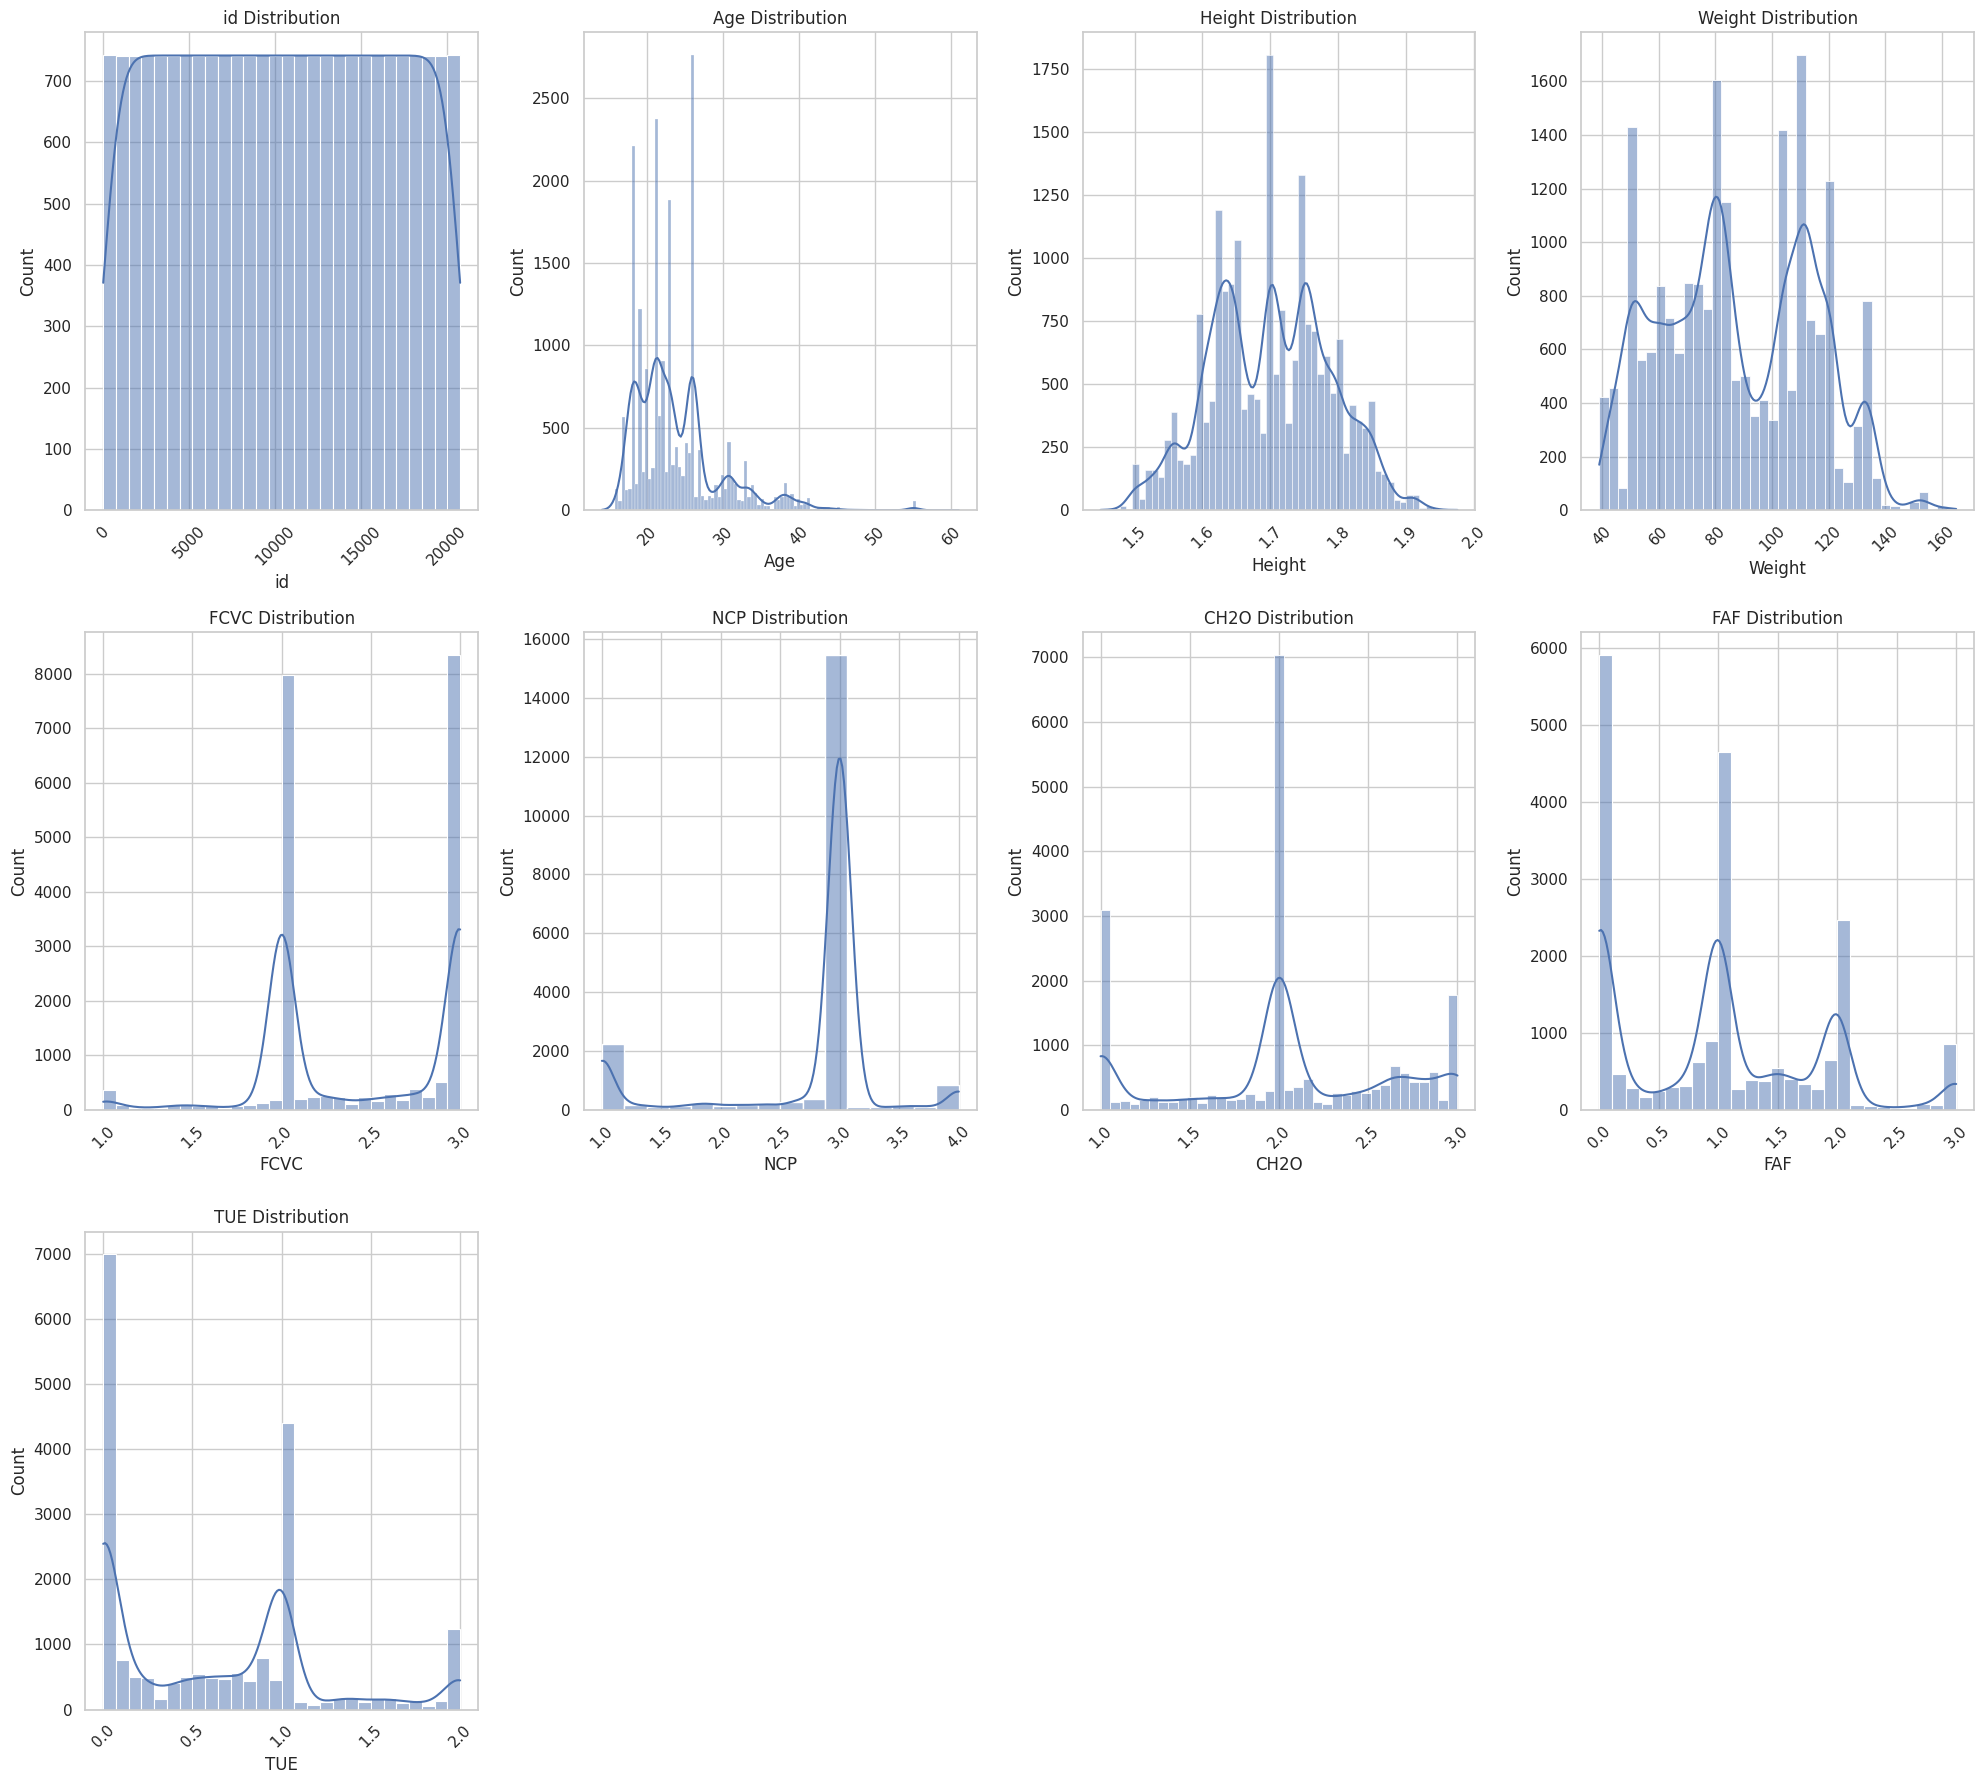

In [14]:
#numerical data visualisation
sns.set(style="whitegrid")
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(train[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Univariate Analysis - Categorical Variables (Countplots)

<ipython-input-16-a5630e01e0b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=train, palette='Set2', ax=axs[0, 0])
<ipython-input-16-a5630e01e0b6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='family_history_with_overweight', data=train, palette='Set2', ax=axs[0, 1])
<ipython-input-16-a5630e01e0b6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FAVC', data=train, palette='Set2', ax=axs[0, 2])
<ipython-input-16-a5630e01e0b6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

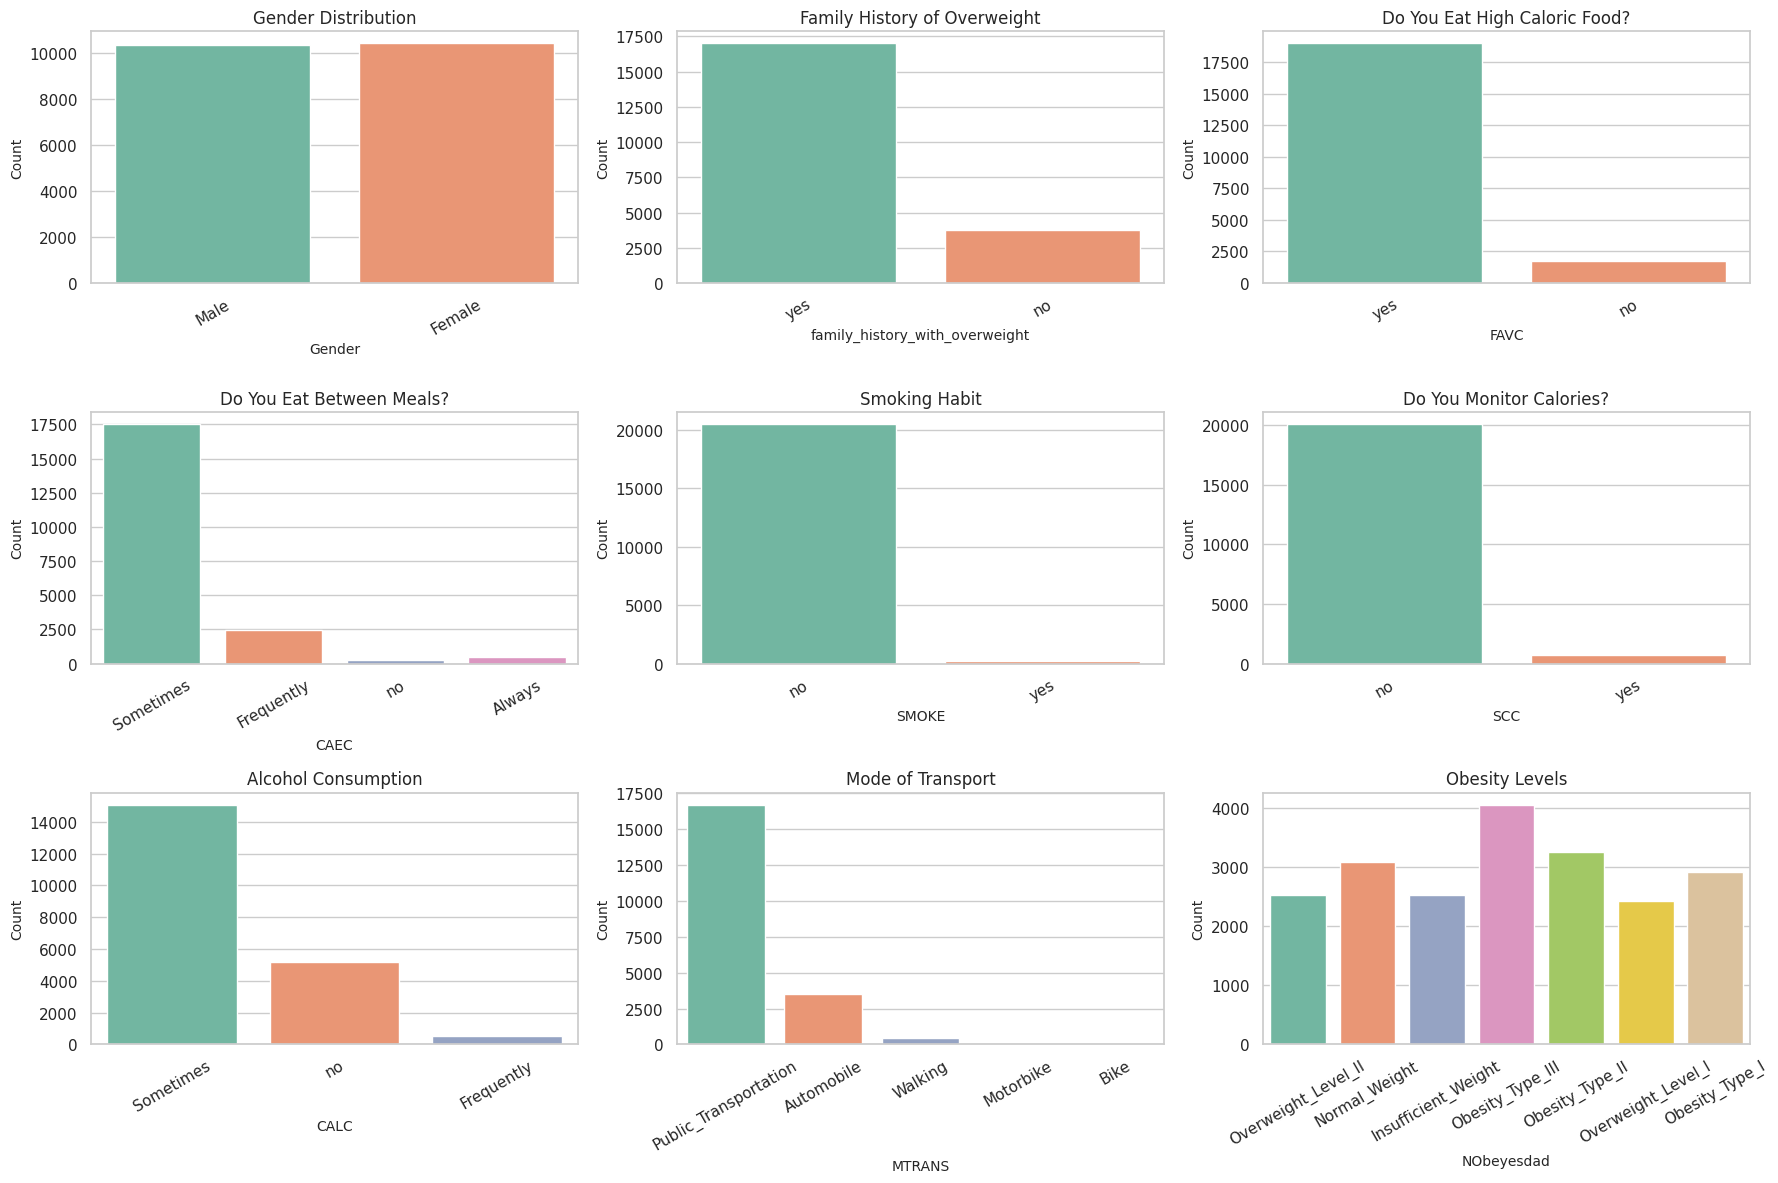

In [16]:
#categorical data visualisation

train = pd.read_csv('/content/gdrive/MyDrive/train1.csv')
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Plotting each categorical variable with countplot
sns.countplot(x='Gender', data=train, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')

sns.countplot(x='family_history_with_overweight', data=train, palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Family History of Overweight')

sns.countplot(x='FAVC', data=train, palette='Set2', ax=axs[0, 2])
axs[0, 2].set_title('Do You Eat High Caloric Food?')

sns.countplot(x='CAEC', data=train, palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Do You Eat Between Meals?')

sns.countplot(x='SMOKE', data=train, palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('Smoking Habit')

sns.countplot(x='SCC', data=train, palette='Set2', ax=axs[1, 2])
axs[1, 2].set_title('Do You Monitor Calories?')

sns.countplot(x='CALC', data=train, palette='Set2', ax=axs[2, 0])
axs[2, 0].set_title('Alcohol Consumption')

sns.countplot(x='MTRANS', data=train, palette='Set2', ax=axs[2, 1])
axs[2, 1].set_title('Mode of Transport')

sns.countplot(x='NObeyesdad', data=train, palette='Set2', ax=axs[2, 2])
axs[2, 2].set_title('Obesity Levels')

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=30)
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


# Bivariate Analysis - Obesity Levels vs. Continuous Variables (Boxplots)

<ipython-input-17-af8d1a3a3ea3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Age', data=train, palette='Set3', ax=axs[0])
<ipython-input-17-af8d1a3a3ea3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Weight', data=train, palette='Set2', ax=axs[1])
<ipython-input-17-af8d1a3a3ea3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Height', data=train, palette='Set1', ax=axs[2])


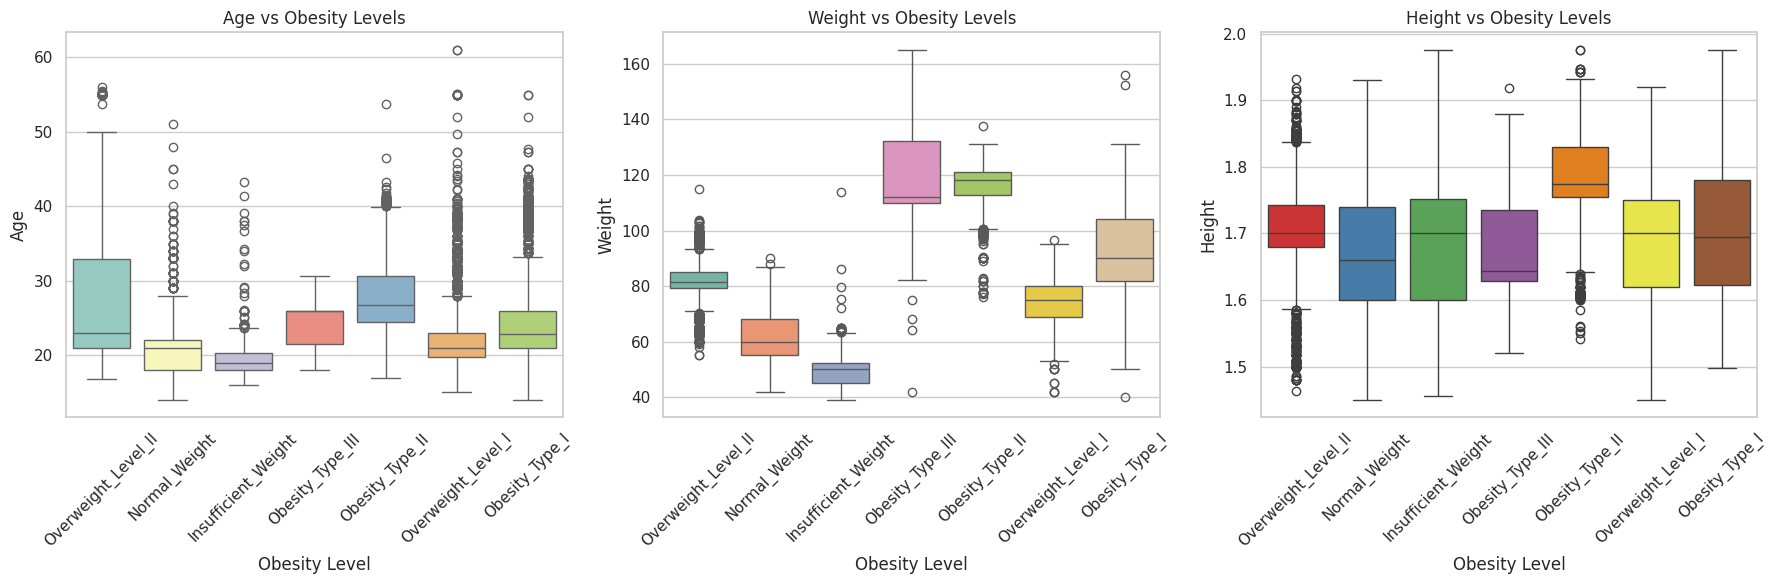

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Age vs. Obesity Level
sns.boxplot(x='NObeyesdad', y='Age', data=train, palette='Set3', ax=axs[0])
axs[0].set_title('Age vs Obesity Levels')
axs[0].set_xlabel('Obesity Level')
axs[0].set_ylabel('Age')
axs[0].tick_params(axis='x', rotation=45)

# Weight vs. Obesity Level
sns.boxplot(x='NObeyesdad', y='Weight', data=train, palette='Set2', ax=axs[1])
axs[1].set_title('Weight vs Obesity Levels')
axs[1].set_xlabel('Obesity Level')
axs[1].set_ylabel('Weight')
axs[1].tick_params(axis='x', rotation=45)

# Height vs. Obesity Level
sns.boxplot(x='NObeyesdad', y='Height', data=train, palette='Set1', ax=axs[2])
axs[2].set_title('Height vs Obesity Levels')
axs[2].set_xlabel('Obesity Level')
axs[2].set_ylabel('Height')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Correlation Analysis - Heatmap for Continuous Variables

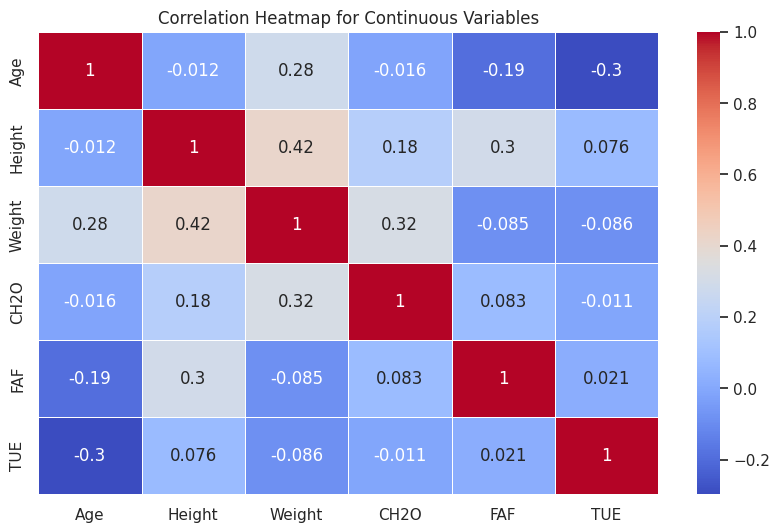

In [18]:
plt.figure(figsize=(10, 6))
corr = train[['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()

# DATA PRE-PROCESSING

In [19]:
#converting binary categorical data into numerical data (0/1)
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train=pd.get_dummies(train,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(test,columns=columns,drop_first=True,dtype=int)

#converting muli-valued attribute data into numerical data by one-hot enconding
le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [20]:
#Power Tranformer to normalise the features to enhance the model's performance
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

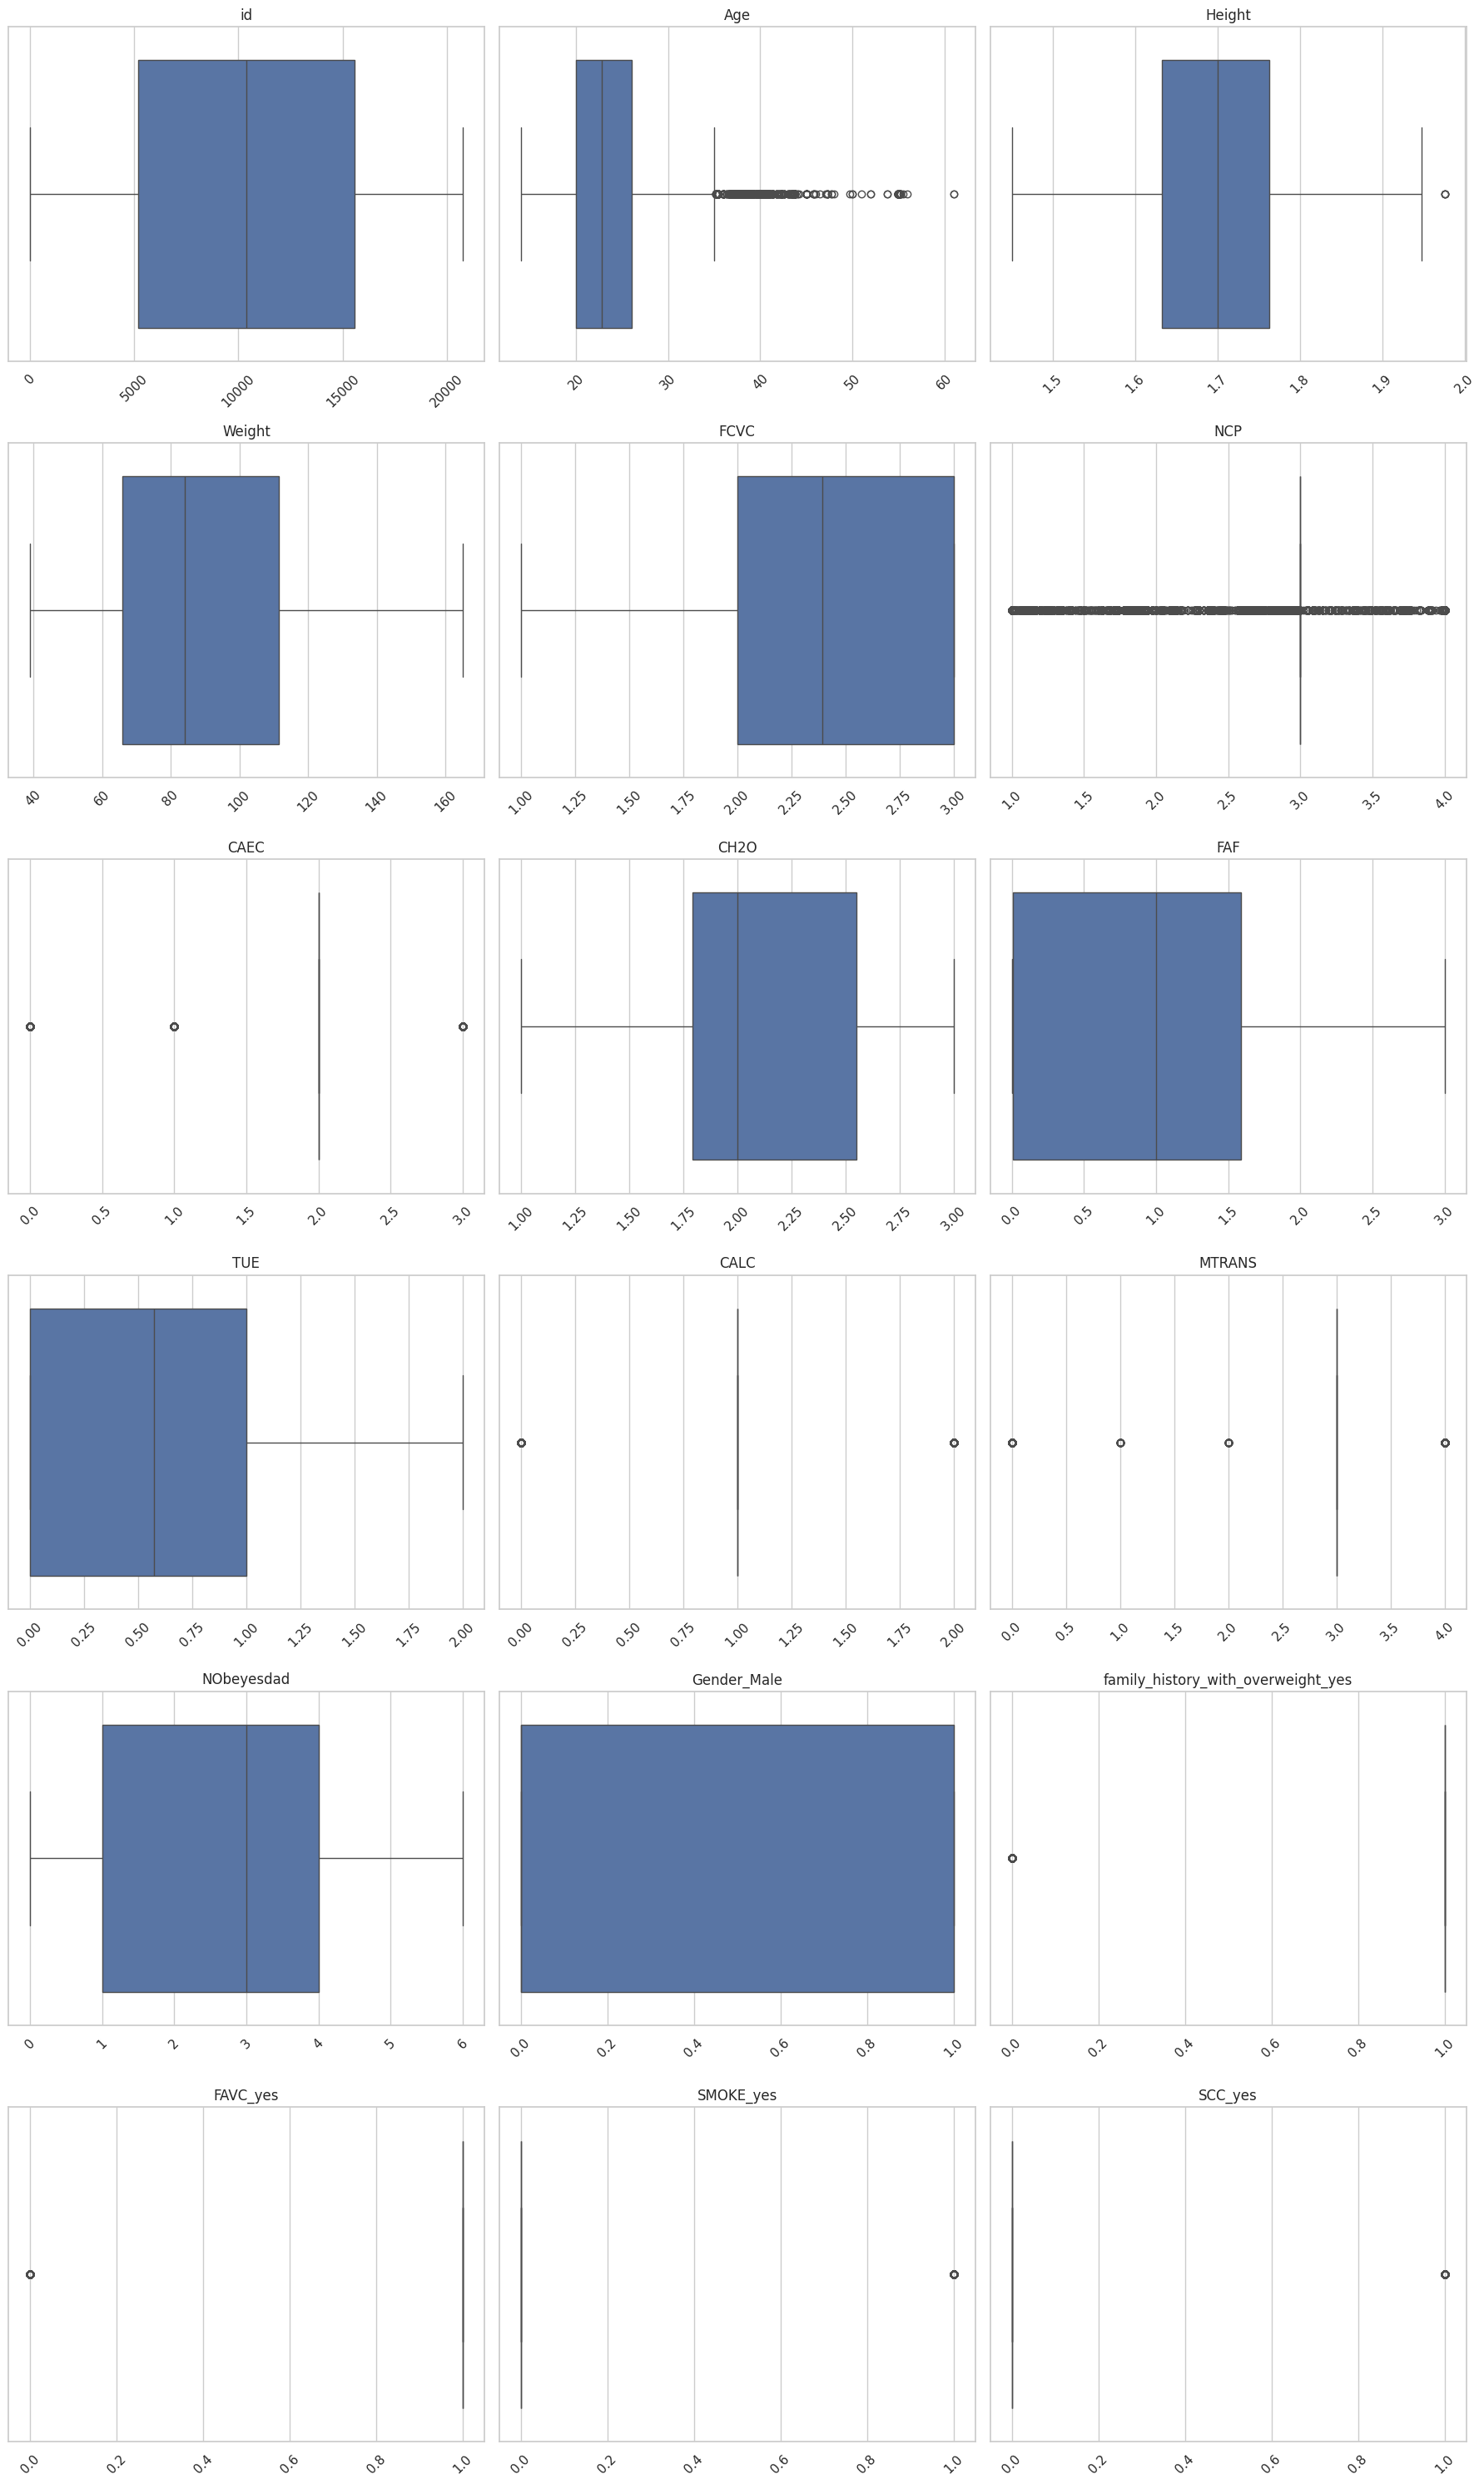

In [21]:
#checking for outliers in training dataset

num_columns = len(train.columns)  # Total number of columns in the DataFrame
cols = 3  # Number of columns in the subplot grid
rows = (num_columns + cols - 1) // cols  # Calculate number of rows needed
fig, axs = plt.subplots(rows, cols, figsize=(18, 5 * rows))  # Adjust the figure size
axs = axs.flatten()
for i, col in enumerate(train.columns):
    sns.boxplot(x=train[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    for label in axs[i].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for better visibility

for j in range(num_columns, len(axs)):
    fig.delaxes(axs[j])  # Remove extra axes for unused subplots

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

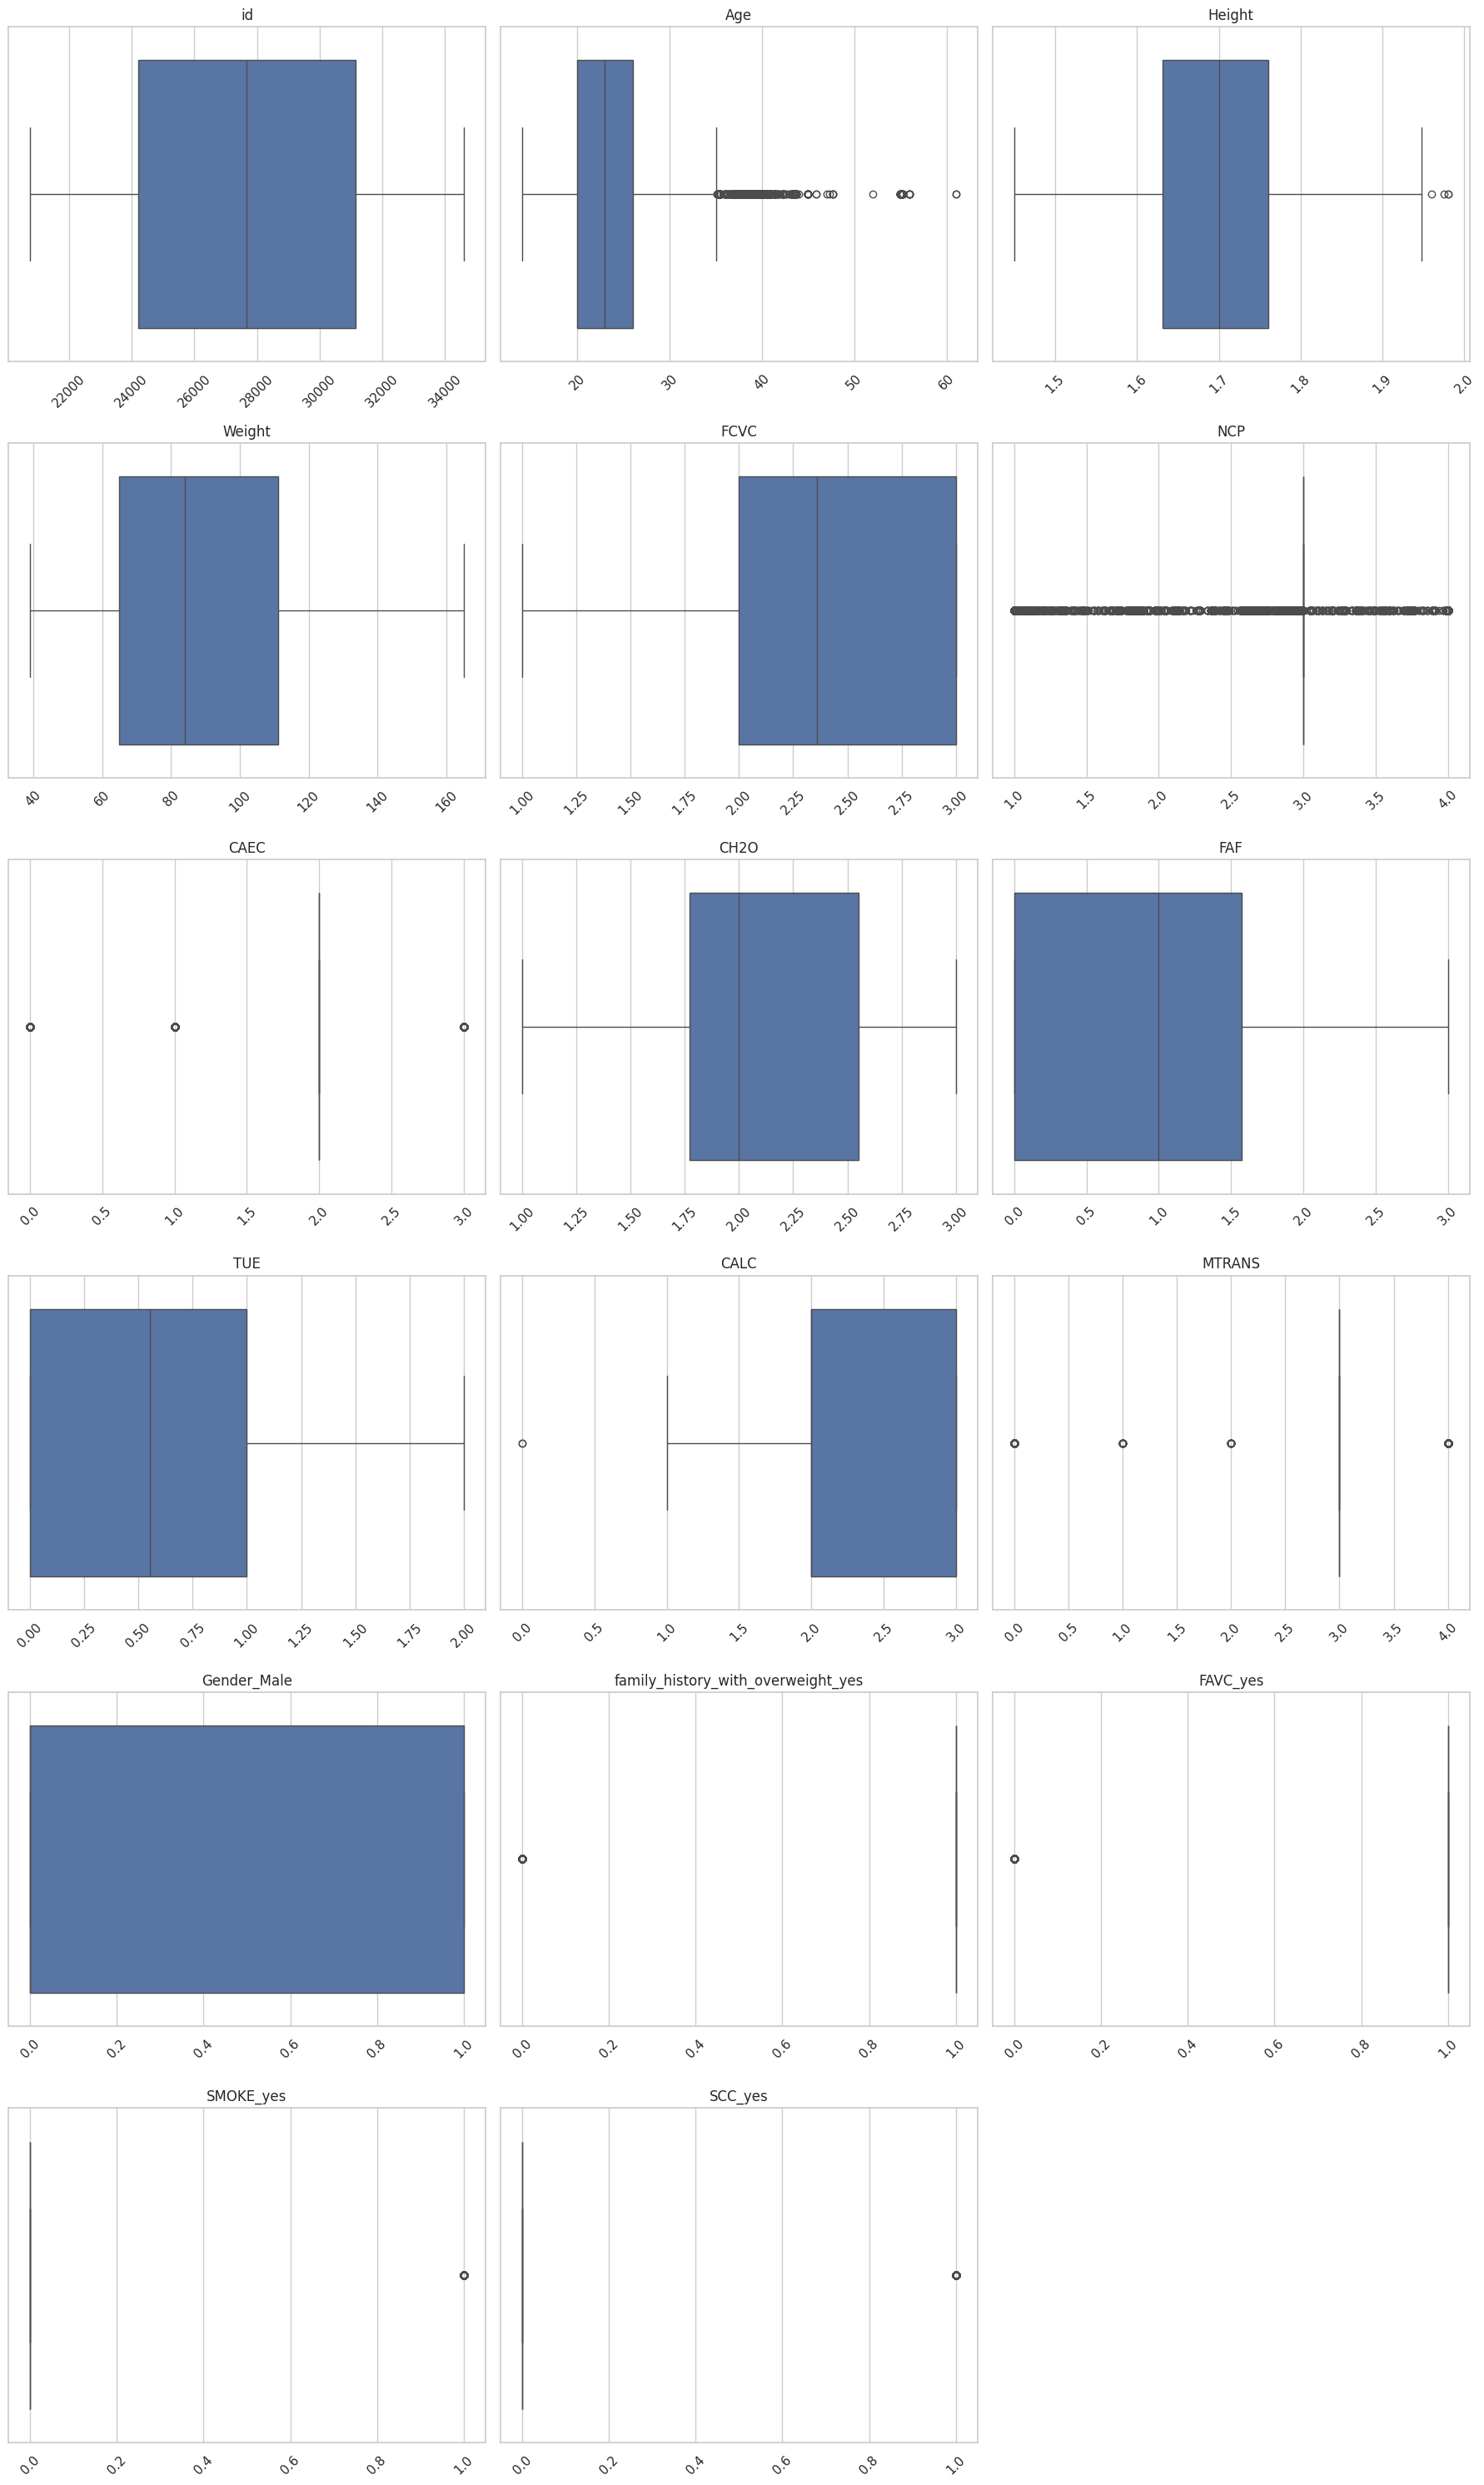

In [22]:
# checking for outliers in testing dataset

num_columns = len(test.columns)  # Total number of columns in the DataFrame
cols = 3  # Number of columns in the subplot grid
rows = (num_columns + cols - 1) // cols  # Calculate number of rows needed

fig, axs = plt.subplots(rows, cols, figsize=(18, 5 * rows))  # Adjust the figure size

axs = axs.flatten()
for i, col in enumerate(test.columns):
    sns.boxplot(x=test[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')  # Clear x-label since it’s a single variable
    axs[i].tick_params(axis='x', rotation=45)  # Rotate labels for better visibility

for j in range(num_columns, len(axs)):
    fig.delaxes(axs[j])  # Remove extra axes foe unused subpolots

plt.tight_layout()
plt.show()

In [23]:
#block of code to remove outliers
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [24]:
b=['CALC','NCP']
for i in b:
    train=train.drop(i,axis=1)

# SPLITTING UP OF THE DATA INTO TRAINING VALIDATION AND TESTING

In [25]:
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

#Final split => train-val-testing => 80-10-10 ==> 16605 - 2076 - 2076
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) #80-20
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #20 => 10-10

# RANDOM FOREST MODEL TRAINING AND EVALUATION

In [26]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
                            criterion='gini', bootstrap=True, class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [27]:
print('Classification Report:', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.87      0.93      0.90        42
           2       0.88      0.93      0.90        56
           3       1.00      0.98      0.99       116
           4       1.00      1.00      1.00       426
           5       0.79      0.85      0.82        40
           6       0.94      0.65      0.77        26

    accuracy                           0.97       719
   macro avg       0.92      0.91      0.91       719
weighted avg       0.97      0.97      0.97       719

Accuracy: 0.9666203059805285


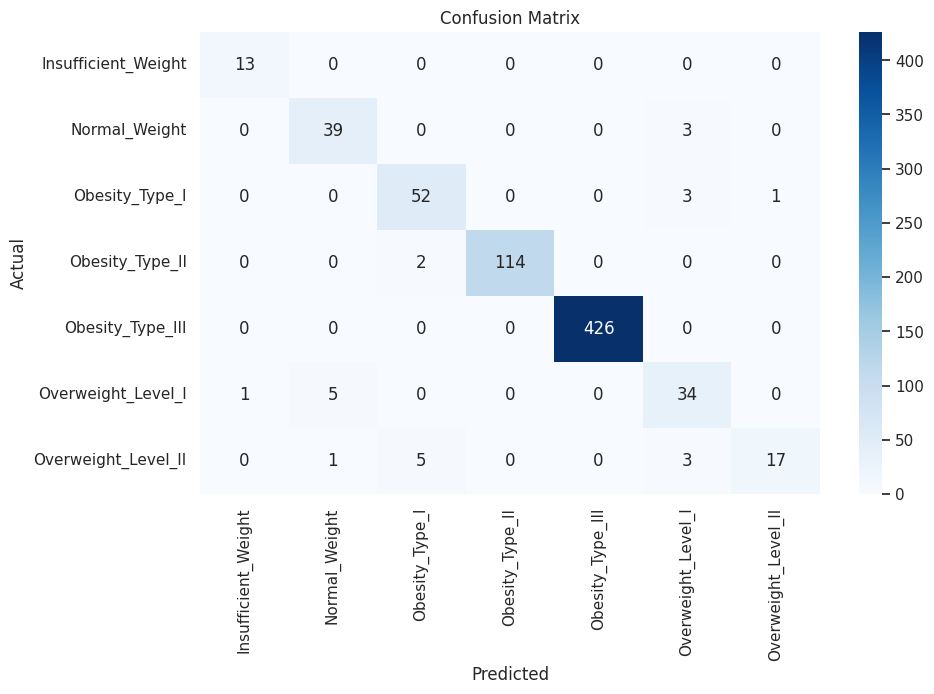

In [28]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#saving the RF model
import joblib
joblib.dump(rf, '/content/random_forest_model.pkl')

['/content/random_forest_model.pkl']

In [30]:
#predicted_labels.csv has the predictions made by the model for the 13840 samples of testing dataset.
y_pred_test = rf.predict(test)
output_file = pd.DataFrame({'id': test['id'], 'NObeyesdad': y_pred_test})
output_file['NObeyesdad'] = le.inverse_transform(output_file['NObeyesdad'])
output_file.to_csv('predicted_labels.csv', index=False)

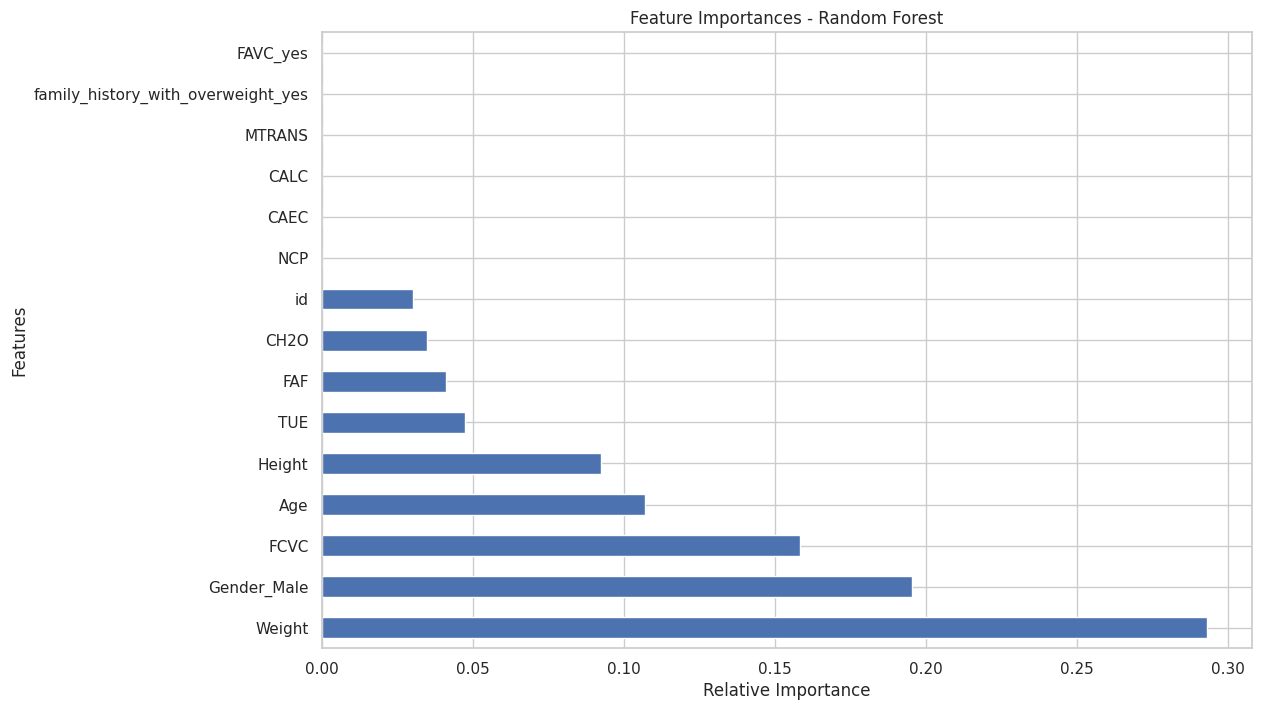

In [31]:
#Analysing the feature importance of the random forest model
plt.figure(figsize=(12, 8))
feat_importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances_rf.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# XGBOOST MODEL TRAINING AND EVALUATION

In [32]:
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:06:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
print('Classification Report:', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.95      0.95      0.95        42
           2       0.94      0.89      0.92        56
           3       0.98      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.83      0.88      0.85        40
           6       0.85      0.85      0.85        26

    accuracy                           0.97       719
   macro avg       0.93      0.94      0.93       719
weighted avg       0.97      0.97      0.97       719

Accuracy: 0.9735744089012517


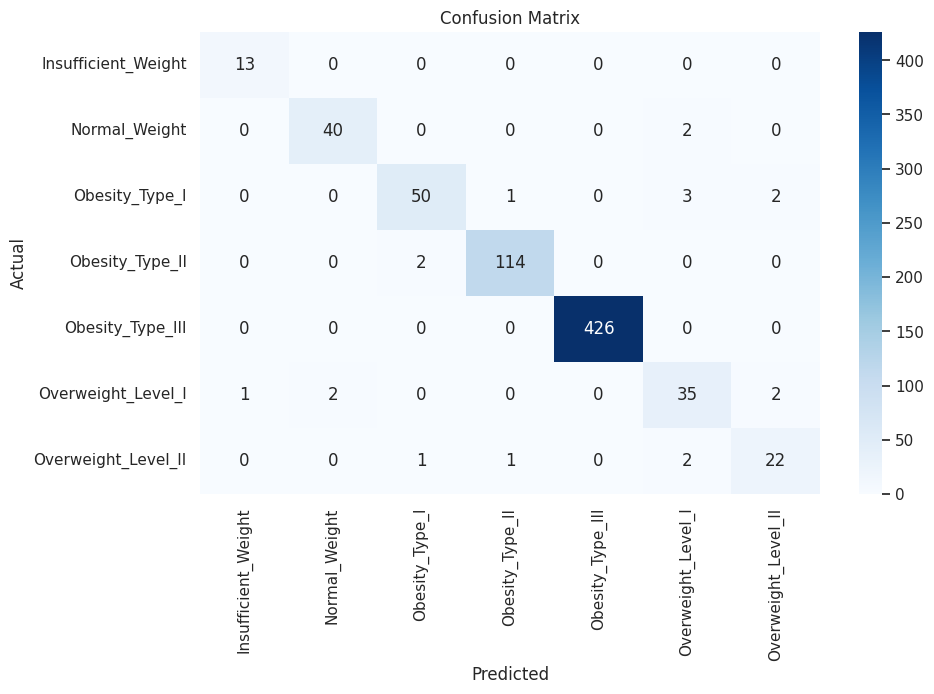

In [34]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
#saving the XGBOOST model
joblib.dump(xgb, '/content/xgboost_model.pkl')

['/content/xgboost_model.pkl']

In [36]:
#predicted_labels.csv has the predictions made by the model for the 13840 samples of testing dataset.
y_pred_test = rf.predict(test)
output_file = pd.DataFrame({'id': test['id'], 'NObeyesdad': y_pred_test})
output_file['NObeyesdad'] = le.inverse_transform(output_file['NObeyesdad'])
output_file.to_csv('predicted_labels.csv', index=False)

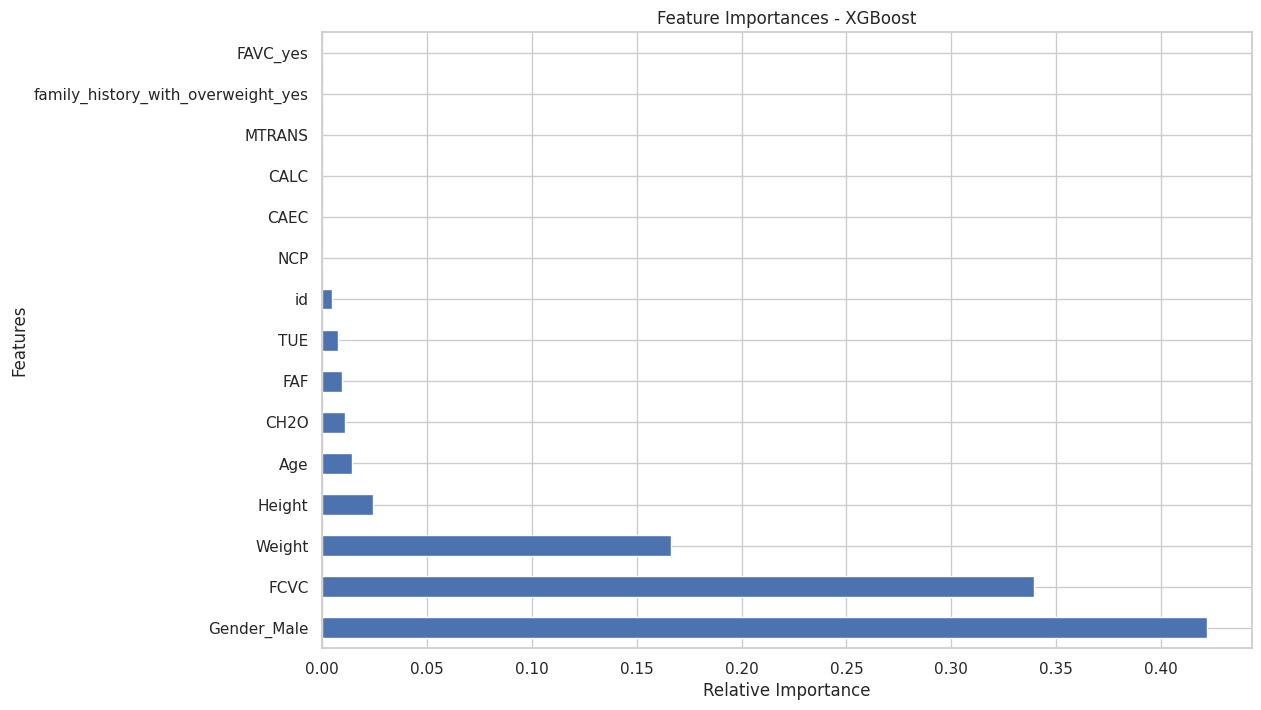

In [37]:
#Analysing the feature importance of the xgboost model
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# SVM MODEL TRAINING AND EVALUATION

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [39]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.86      0.86      0.86        42
           2       0.91      0.89      0.90        56
           3       0.98      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.73      0.80      0.76        40
           6       0.86      0.73      0.79        26

    accuracy                           0.96       719
   macro avg       0.90      0.89      0.89       719
weighted avg       0.96      0.96      0.96       719


Accuracy Score: 0.9596662030598053


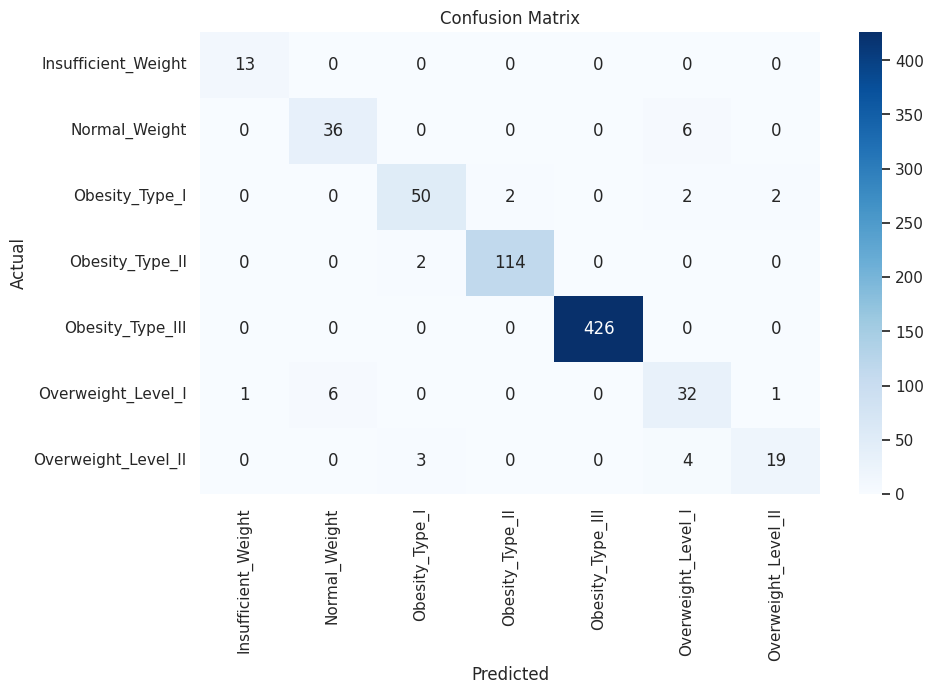

In [40]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Saving the trained SVM model
joblib.dump(svm_model, '/content/svm_model.pkl')

['/content/svm_model.pkl']

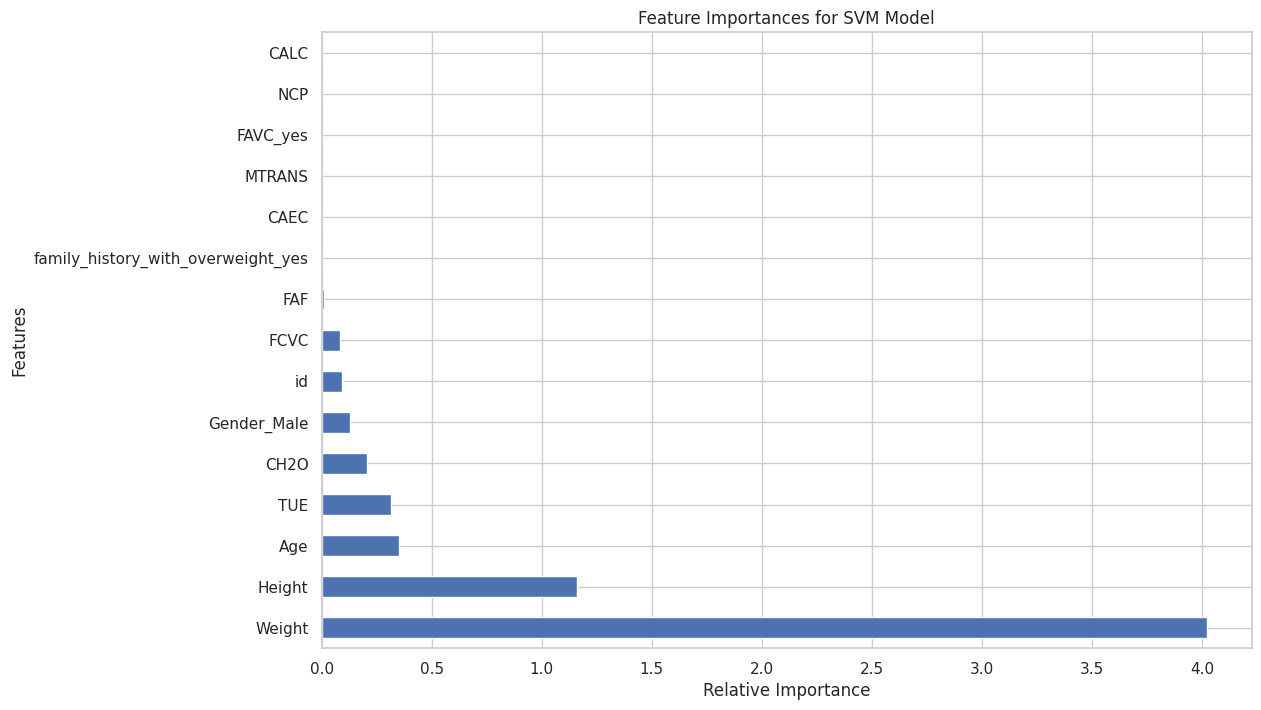

In [42]:
# Analyzing the feature importance of the SVM model

plt.figure(figsize=(12, 8))
feat_importances = pd.Series(np.abs(svm_model.coef_[0]), index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances for SVM Model')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# LOGISTIC REGRESSION MODEL TRAINING AND EVALUATION

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42, max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("\nAccuracy Score - Logistic Regression:", accuracy_score(y_test, y_pred_logreg))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.83      0.83      0.83        42
           2       0.92      0.86      0.89        56
           3       0.97      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.68      0.80      0.74        40
           6       0.84      0.62      0.71        26

    accuracy                           0.95       719
   macro avg       0.87      0.87      0.87       719
weighted avg       0.95      0.95      0.95       719


Accuracy Score - Logistic Regression: 0.9513212795549374


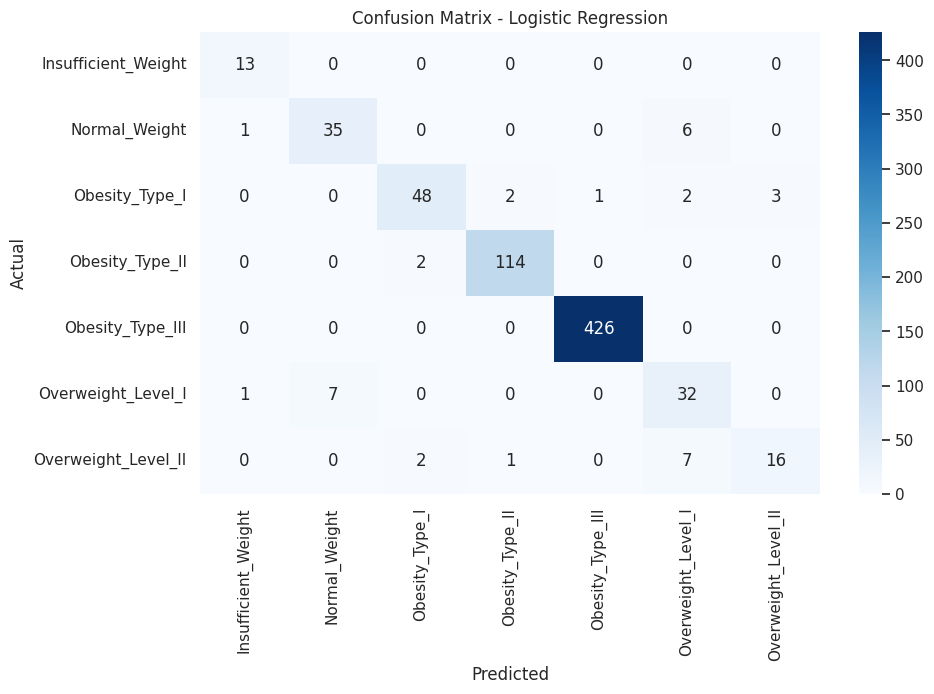

In [44]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [45]:
joblib.dump(logreg, '/content/logistic_regression_model.pkl')

['/content/logistic_regression_model.pkl']

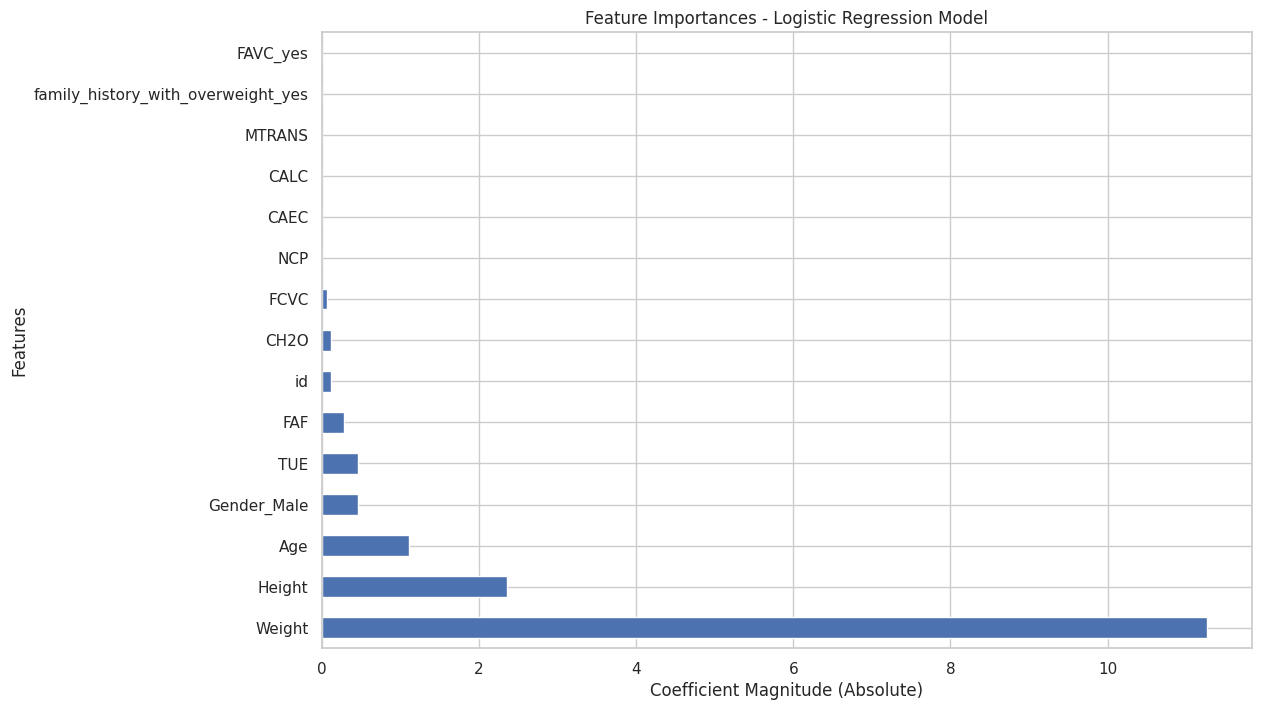

In [46]:
coefficients = np.abs(logreg.coef_[0])
feat_importances_logreg = pd.Series(coefficients, index=X.columns)

# Plot the top 15 feature importances
plt.figure(figsize=(12, 8))
feat_importances_logreg.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - Logistic Regression Model')
plt.xlabel('Coefficient Magnitude (Absolute)')
plt.ylabel('Features')
plt.show()

# DECISION TREE MODEL TRAINING AND EVALUATION

In [47]:
# Decision Tree Model Training and Evaluation
dt = DecisionTreeClassifier(random_state=45, max_depth=9, )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.81      0.90      0.85        42
           2       0.91      0.91      0.91        56
           3       0.99      0.98      0.99       116
           4       1.00      0.99      0.99       426
           5       0.78      0.78      0.78        40
           6       0.88      0.85      0.86        26

    accuracy                           0.96       719
   macro avg       0.90      0.89      0.89       719
weighted avg       0.96      0.96      0.96       719


Accuracy Score: 0.9582753824756607


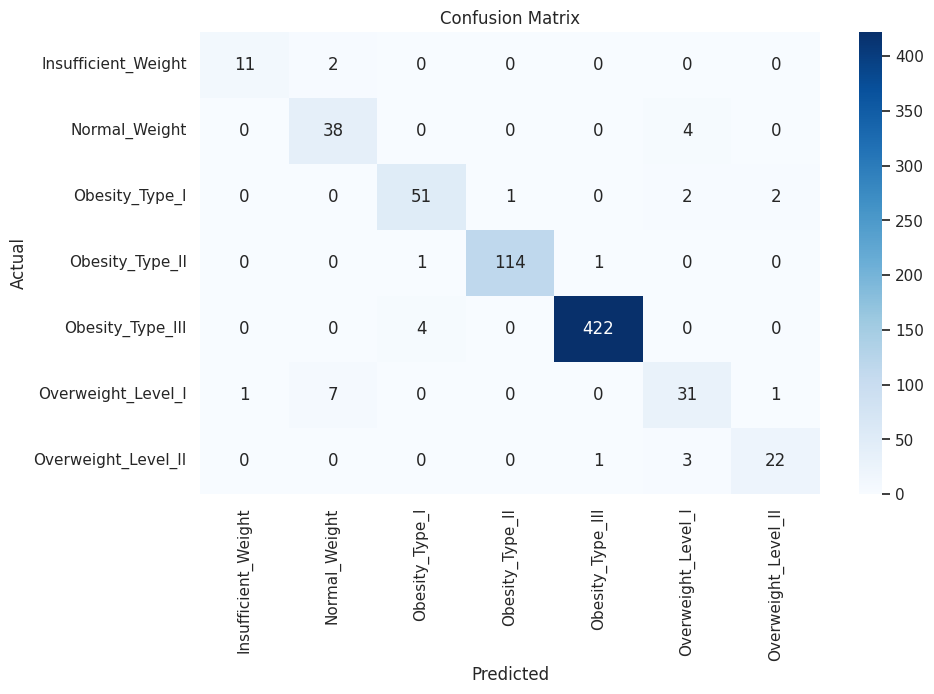

In [49]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# Saving the trained SVM model
joblib.dump(dt, '/content/dt.pkl')

['/content/dt.pkl']

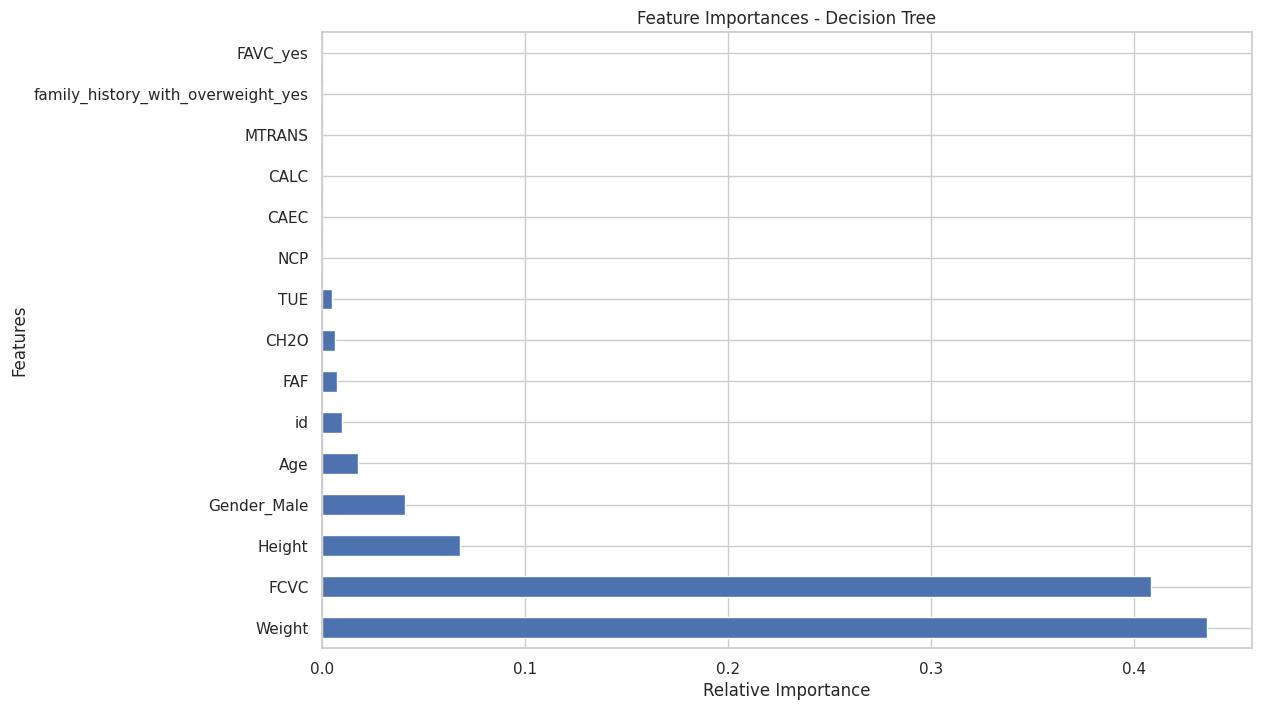

In [51]:
# Analyze feature importances
plt.figure(figsize=(12, 8))
feature_names = X.columns.tolist()
feat_importances_dt = pd.Series(dt.feature_importances_, index=feature_names)
feat_importances_dt.nlargest(15).plot(kind='barh')  # Plotting the top 15 features
plt.title('Feature Importances - Decision Tree')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

#**KNN TRAINING AND EVALUATION**

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

# Predict on the test set
y_pred=KNN_model.predict(X_test)

# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.54      0.62      0.58        42
           2       0.75      0.64      0.69        56
           3       0.90      0.97      0.94       116
           4       0.99      1.00      1.00       426
           5       0.50      0.55      0.52        40
           6       0.57      0.31      0.40        26

    accuracy                           0.89       719
   macro avg       0.73      0.68      0.70       719
weighted avg       0.89      0.89      0.89       719


Accuracy Score: 0.8901251738525731


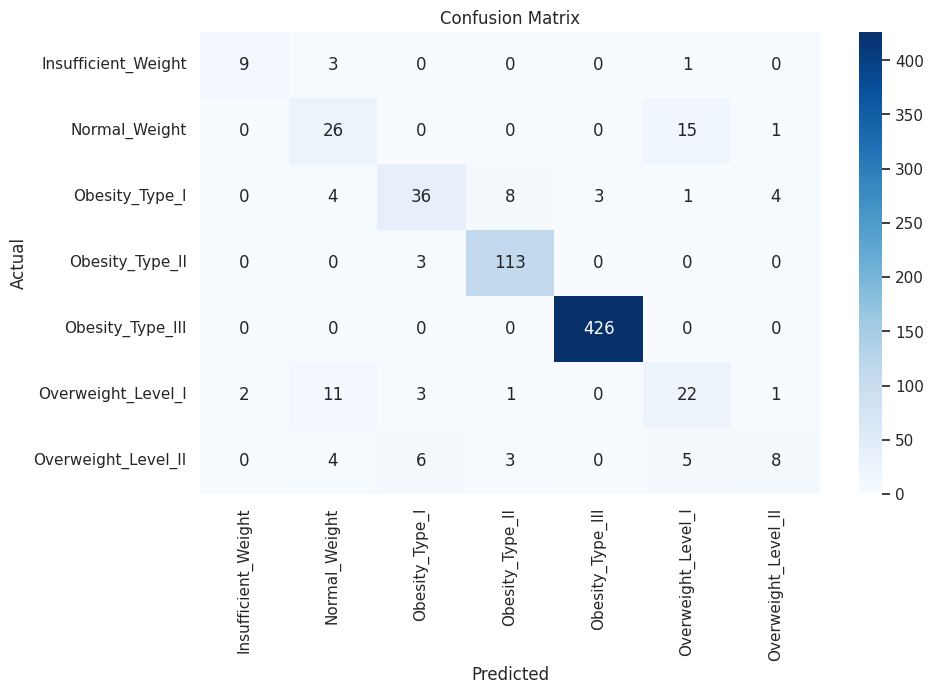

In [53]:
#Confusion Matrix for KNN
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Saving the KNN model
joblib.dump(KNN_model, '/content/KNN_model.pkl')

['/content/KNN_model.pkl']

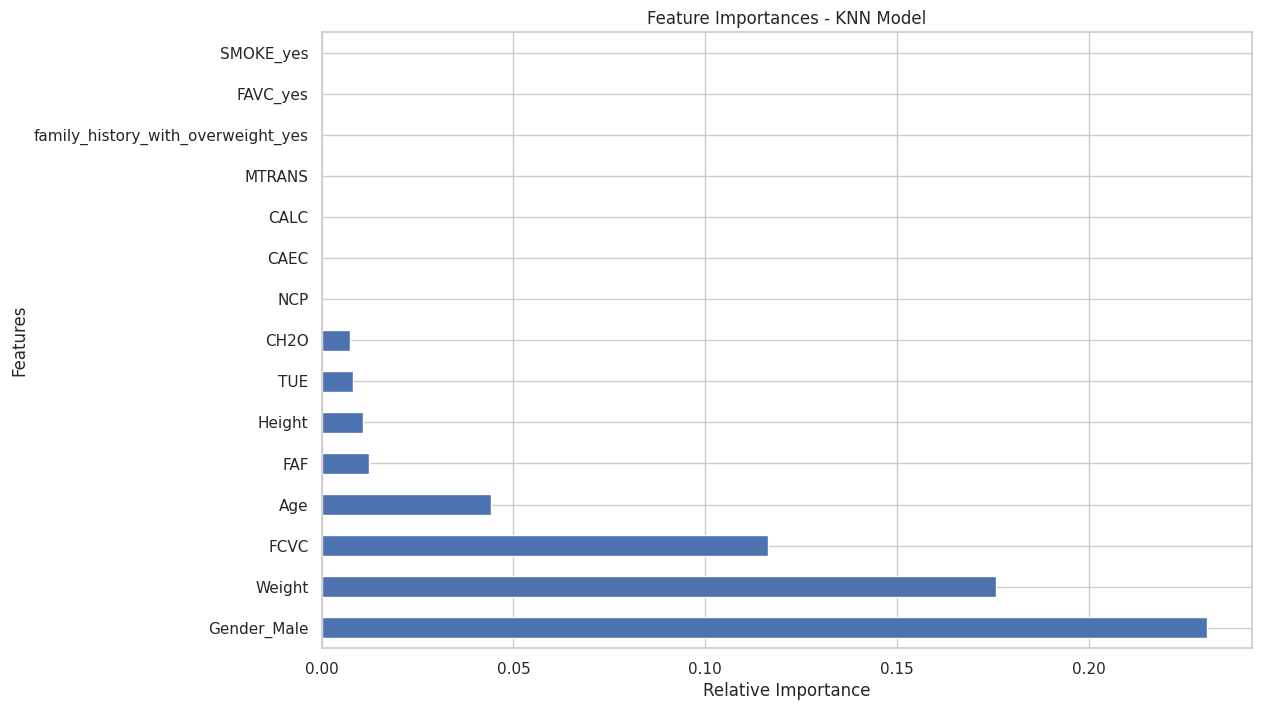

In [55]:
# Analyzing the feature importance of the KNN model

results = permutation_importance(KNN_model, X_test, y_test, n_repeats=10, random_state=42) # Calculate permutation importance
feat_importances_knn = pd.Series(results.importances_mean, index=X.columns)
plt.figure(figsize=(12, 8))
feat_importances_knn.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - KNN Model')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# SINGLE LAYER PERCEPTRON (SLP) MODEL TRAINING AND EVALUATION


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Single Layer Perceptron Model
slp_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
slp_model.fit(X_train, y_train)

# Predicting with the model
y_pred = slp_model.predict(X_test)

In [57]:
# Classification report and accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.86      0.86      0.86        42
           2       0.90      0.84      0.87        56
           3       0.99      0.98      0.99       116
           4       1.00      1.00      1.00       426
           5       0.65      0.80      0.72        40
           6       0.70      0.54      0.61        26

    accuracy                           0.95       719
   macro avg       0.86      0.86      0.86       719
weighted avg       0.95      0.95      0.95       719


Accuracy Score: 0.9485396383866481


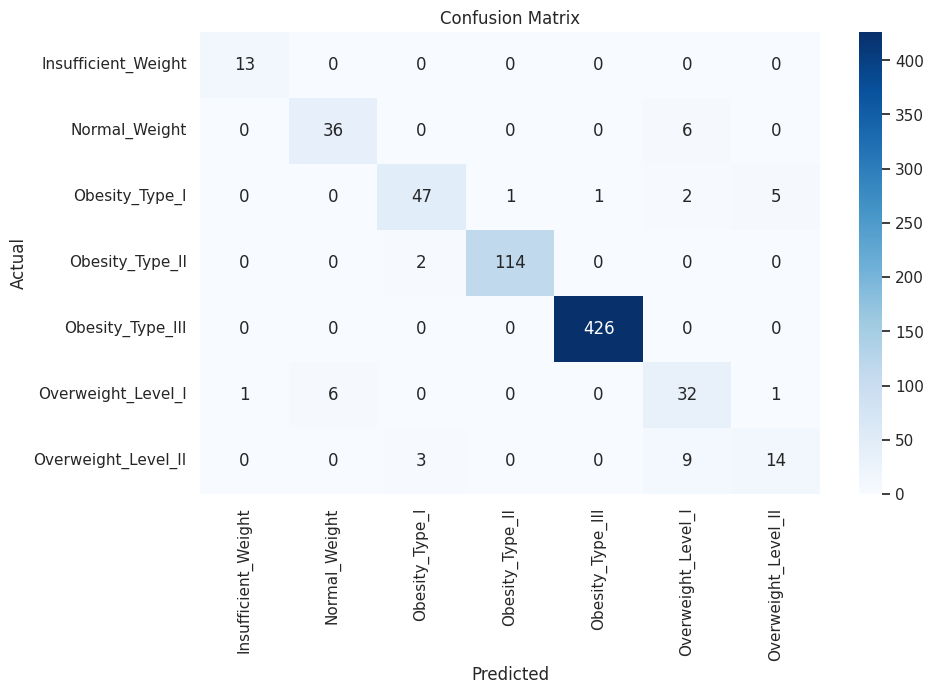

In [58]:
# Confusion matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
joblib.dump(slp_model, '/content/slp_model.pkl')

['/content/slp_model.pkl']

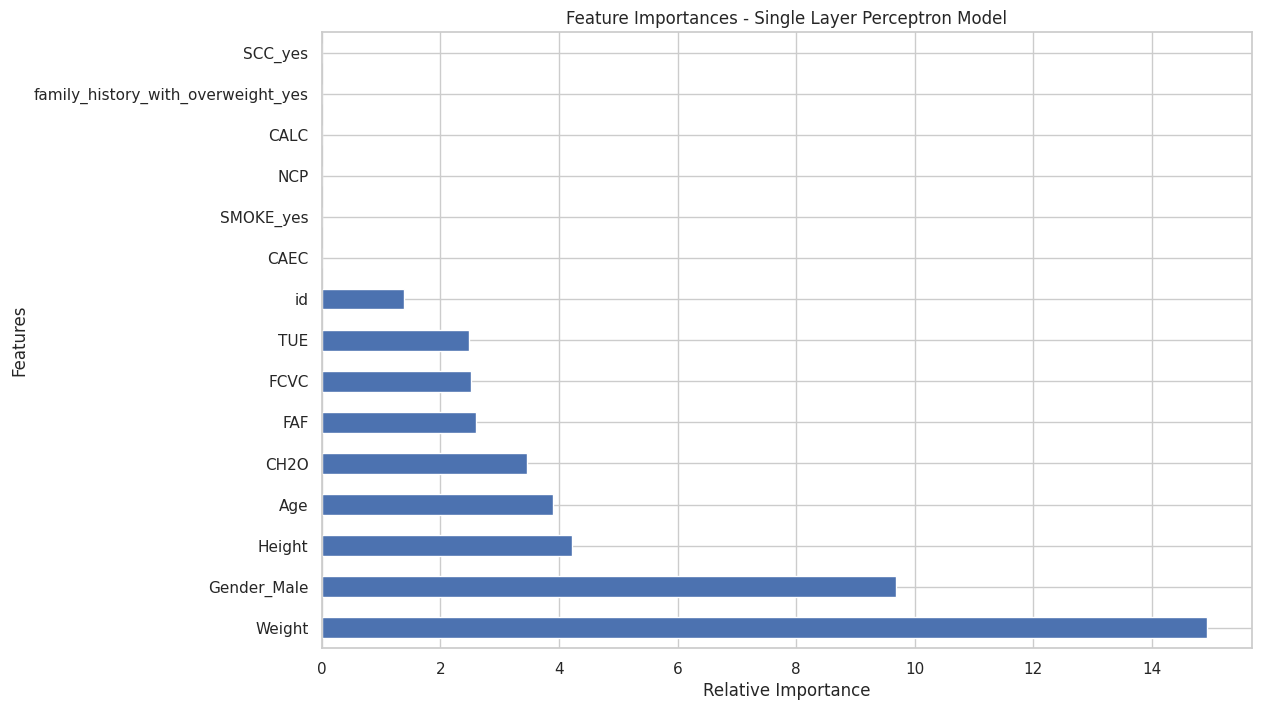

In [60]:
# Analyzing the feature importance (weights) of the SLP model
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(np.abs(slp_model.coefs_[0]).sum(axis=1), index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - Single Layer Perceptron Model')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

#MULTILAYER PERCEPTRON MODEL TRAINING AND EVALUATION

In [61]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)


y_pred_mlp = mlp.predict(X_test)

print('MLP Classification Report:\n', classification_report(y_test, y_pred_mlp))
print('MLP Accuracy:', accuracy_score(y_test, y_pred_mlp))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.78      0.86      0.82        42
           2       0.82      0.80      0.81        56
           3       0.98      0.97      0.98       116
           4       1.00      1.00      1.00       426
           5       0.66      0.62      0.64        40
           6       0.74      0.65      0.69        26

    accuracy                           0.94       719
   macro avg       0.83      0.84      0.84       719
weighted avg       0.94      0.94      0.94       719

MLP Accuracy: 0.9388038942976356


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


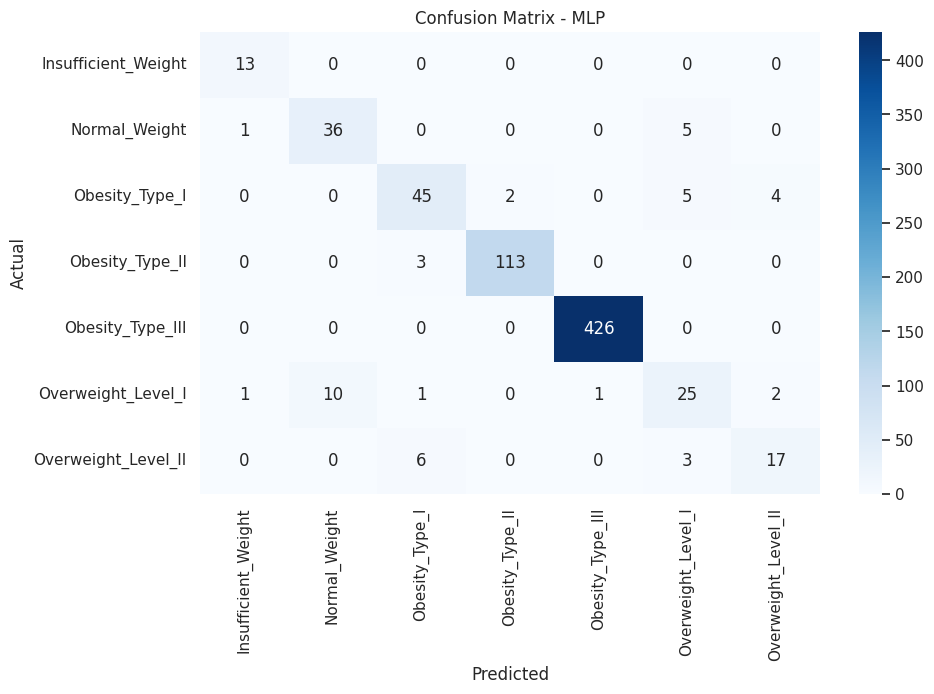

In [62]:
plt.figure(figsize=(10, 6))
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

In [67]:
joblib.dump(mlp, '/content/mlp_model.pkl')

['/content/mlp_model.pkl']

#GAUSSIAN NAIVE BAYES MODEL TRAINING AND EVALUATION


In [68]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

print('Naive Bayes Classification Report:\n', classification_report(y_test, y_pred_nb))
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.63      0.52      0.57        42
           2       0.40      0.07      0.12        56
           3       0.73      1.00      0.85       116
           4       0.97      1.00      0.98       426
           5       0.48      0.55      0.51        40
           6       0.72      0.50      0.59        26

    accuracy                           0.86       719
   macro avg       0.69      0.65      0.65       719
weighted avg       0.83      0.86      0.83       719

Naive Bayes Accuracy: 0.8553546592489569


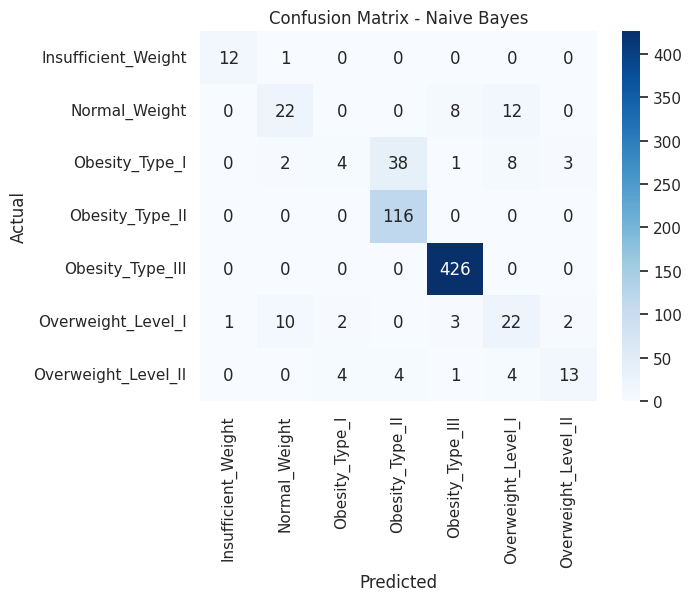

In [69]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [70]:
joblib.dump(nb_clf, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

#ARTIFICAL NEURAL NETWORK (ANN) MODEL TRAINING AND EVALUATION

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 - 3s - 18ms/step - accuracy: 0.7476 - loss: 0.7602 - val_accuracy: 0.7744 - val_loss: 0.5658
Epoch 2/50
180/180 - 1s - 5ms/step - accuracy: 0.8437 - loss: 0.4147 - val_accuracy: 0.7632 - val_loss: 0.6624
Epoch 3/50
180/180 - 1s - 4ms/step - accuracy: 0.8693 - loss: 0.3462 - val_accuracy: 0.7674 - val_loss: 0.7523
Epoch 4/50
180/180 - 1s - 6ms/step - accuracy: 0.8801 - loss: 0.3120 - val_accuracy: 0.7674 - val_loss: 0.7716
Epoch 5/50
180/180 - 1s - 4ms/step - accuracy: 0.8870 - loss: 0.2865 - val_accuracy: 0.7674 - val_loss: 0.8632
Epoch 6/50
180/180 - 1s - 3ms/step - accuracy: 0.8917 - loss: 0.2673 - val_accuracy: 0.7730 - val_loss: 0.8608
Epoch 7/50
180/180 - 0s - 2ms/step - accuracy: 0.9032 - loss: 0.2528 - val_accuracy: 0.7702 - val_loss: 0.9958
Epoch 8/50
180/180 - 1s - 4ms/step - accuracy: 0.9093 - loss: 0.2370 - val_accuracy: 0.7646 - val_loss: 1.0822
Epoch 9/50
180/180 - 1s - 3ms/step - accuracy: 0.9095 - loss: 0.2362 - val_accuracy: 0.7674 - val_loss: 1.0968
Epoch 10/50

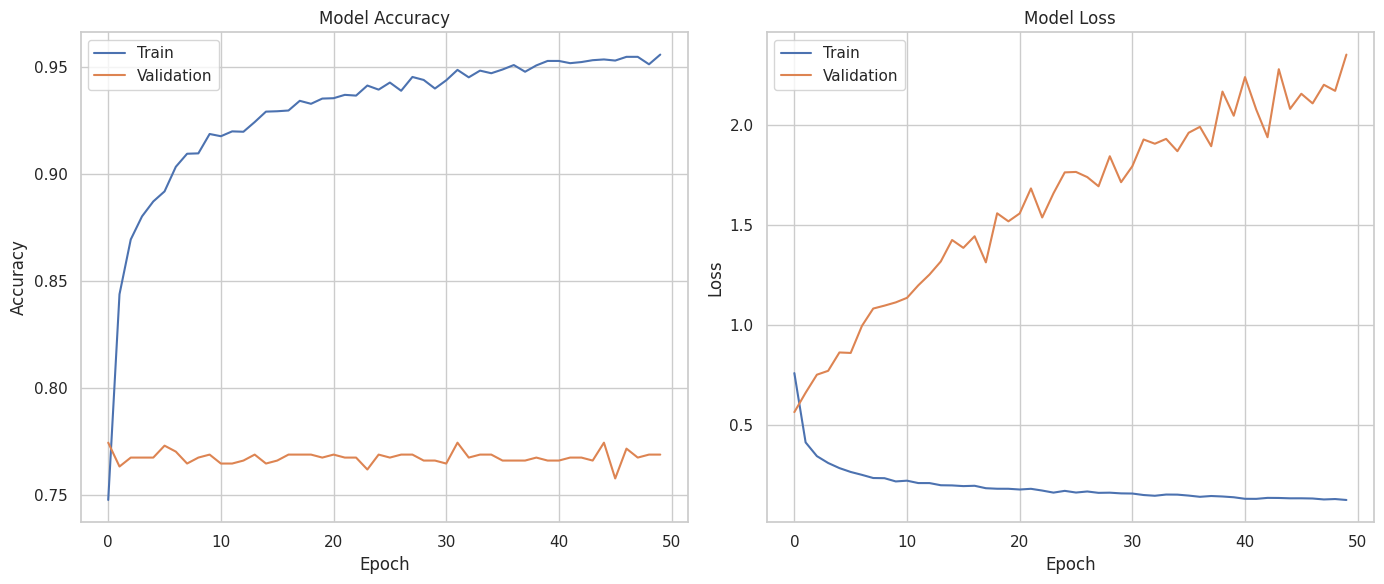

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann = Sequential()


ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.3))

ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.3))

ann.add(Dense(7, activation='softmax'))
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ann.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

ann_eval = ann.evaluate(X_test, y_test)
print(f"ANN Test Loss: {ann_eval[0]}")
print(f"ANN Test Accuracy: {ann_eval[1]}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

y_pred_ann = ann.predict(X_test)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)



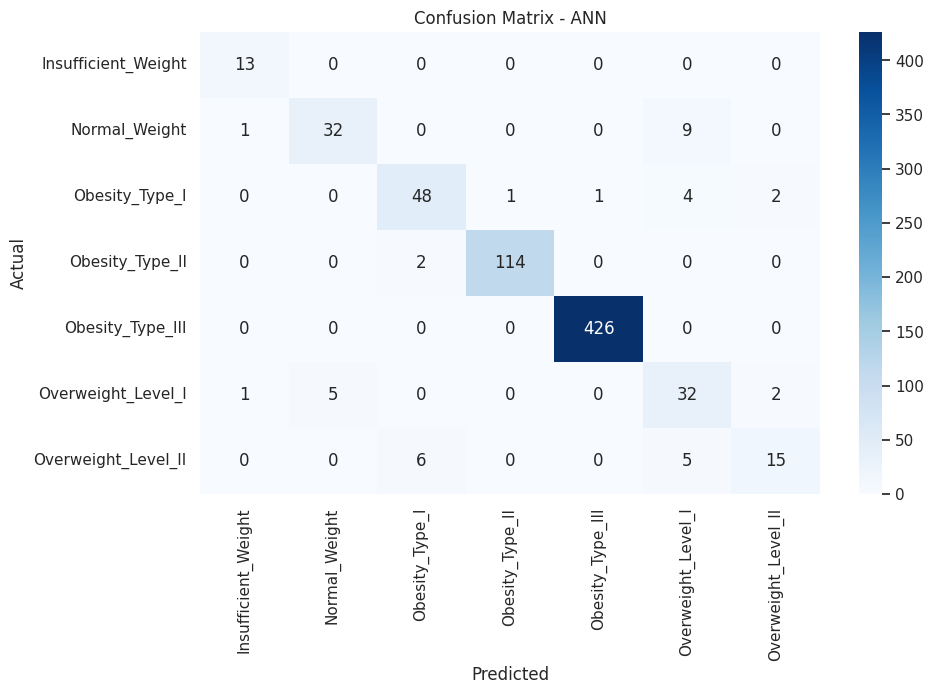

In [65]:
plt.figure(figsize=(10, 6))
cm_ann = confusion_matrix(y_test, y_pred_ann_classes)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN')
plt.show()


In [66]:
ann.save('/content/ann_model.h5')

#CONVOLUTIONAL NEURAL NETWORK (CNN) MODEL TRAINING AND EVALUATION

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
180/180 - 8s - 42ms/step - accuracy: 0.7459 - loss: 0.7398 - val_accuracy: 0.7953 - val_loss: 0.5559
Epoch 2/50
180/180 - 1s - 8ms/step - accuracy: 0.8526 - loss: 0.3748 - val_accuracy: 0.7730 - val_loss: 0.7797
Epoch 3/50
180/180 - 2s - 11ms/step - accuracy: 0.8792 - loss: 0.3087 - val_accuracy: 0.7827 - val_loss: 0.8327
Epoch 4/50
180/180 - 1s - 4ms/step - accuracy: 0.8926 - loss: 0.2799 - val_accuracy: 0.7786 - val_loss: 0.8132
Epoch 5/50
180/180 - 1s - 4ms/step - accuracy: 0.9001 - loss: 0.2593 - val_accuracy: 0.7758 - val_loss: 0.8927
Epoch 6/50
180/180 - 1s - 4ms/step - accuracy: 0.9091 - loss: 0.2417 - val_accuracy: 0.7716 - val_loss: 0.9606
Epoch 7/50
180/180 - 1s - 4ms/step - accuracy: 0.9171 - loss: 0.2274 - val_accuracy: 0.7772 - val_loss: 1.0197
Epoch 8/50
180/180 - 1s - 4ms/step - accuracy: 0.9180 - loss: 0.2142 - val_accuracy: 0.7702 - val_loss: 1.0966
Epoch 9/50
180/180 - 1s - 7ms/step - accuracy: 0.9225 - loss: 0.2094 - val_accuracy: 0.7744 - val_loss: 1.0952

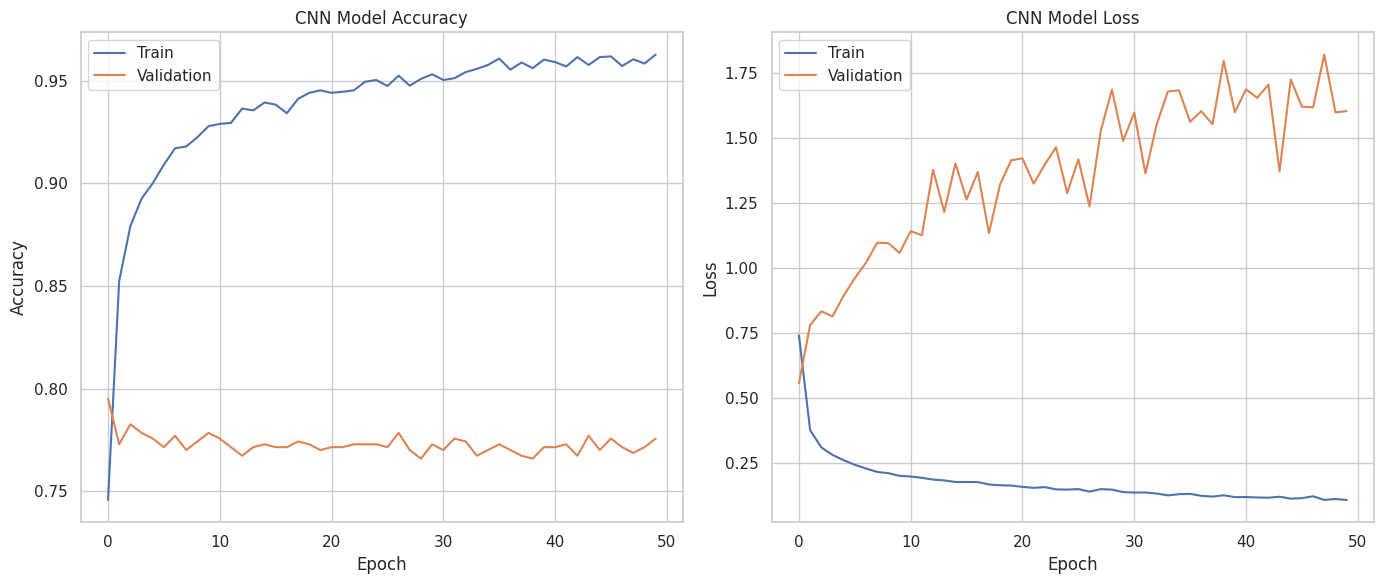

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       0.80      0.83      0.81        42
           2       0.85      0.91      0.88        56
           3       0.98      0.97      0.98       116
           4       1.00      1.00      1.00       426
           5       0.75      0.75      0.75        40
           6       0.89      0.62      0.73        26

    accuracy                           0.95       719
   macro avg       0.86      0.87      0.86       719
weighted avg       0.95      0.95      0.95       719



In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np

X_train_cnn = np.expand_dims(X_train, axis=2)
X_val_cnn = np.expand_dims(X_val, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(7, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = cnn.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=50, batch_size=32, verbose=2)

cnn_eval = cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Test Loss: {cnn_eval[0]}")
print(f"CNN Test Accuracy: {cnn_eval[1]}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

y_pred_cnn = cnn.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

print('CNN Classification Report:\n', classification_report(y_test, y_pred_cnn_classes))


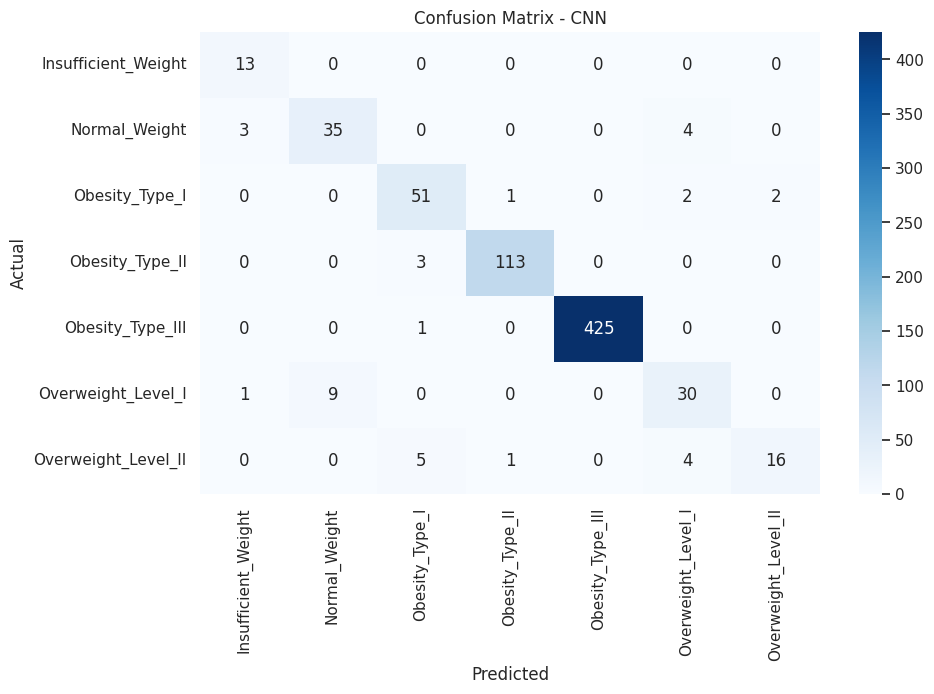

In [78]:
plt.figure(figsize=(10, 6))
cm_cnn = confusion_matrix(y_test, y_pred_cnn_classes)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

In [80]:
cnn.save('/content/cnn_model.h5')